In [1]:
import pickle
import matplotlib.pyplot as plt
data_path = "/Users/aruna.nyssanbay/Documents/LR1/data.pickle"  # if the file can't be found try absolute path

# The data is stored in .pickle format, so we use pickle module to load it. 
# It takes several seconds to load the file. 
with open(data_path, "rb") as file:
    records = pickle.load(file)
    file.close()

In [2]:
# Print all dyads ids
print(records.keys())


dict_keys(['[100, 101]', '[102, 103]', '[104, 105]', '[200, 201]', '[202, 203]', '[204, 205]', '[206, 207]', '[208, 209]', '[210, 211]', '[300, 301]', '[304, 305]', '[306, 307]', '[308, 309]', '[310, 311]'])


In [3]:
# Print an example of block ids. The keys are integers. 
print(records['[200, 201]'].keys())

dict_keys([1, 2, 3])


In [4]:
# Print the first 5 rows of the table
records['[100, 101]'][1].head()

timestamp  p0_score  p1_score  p0_agent_x  p0_agent_y  p1_agent_x  \
0   0.000000       0.0       0.0         0.5         0.5         0.5   
1   0.007808       0.0       0.0         0.5         0.5         0.5   
2   0.016175       0.0       0.0         0.5         0.5         0.5   
3   0.025929       0.0       0.0         0.5         0.5         0.5   
4   0.032879       0.0       0.0         0.5         0.5         0.5   

   p1_agent_y  p0_gaze_x  p0_gaze_y  p1_gaze_x  ...  coop0_entered_by_p1  \
0         0.5   0.000000   0.000000   0.000000  ...                    0   
1         0.5   0.468573   0.523261   0.603357  ...                    0   
2         0.5   0.467244   0.523696   0.599759  ...                    0   
3         0.5   0.466559   0.523555   0.599048  ...                    0   
4         0.5   0.467537   0.525252   0.599965  ...                    0   

   coop1_entered_by_p0  coop1_entered_by_p1  comp_left_by_p0  comp_left_by_p1  \
0                    0                    0                0                0   
1                    0                    0                0                0   
2                    0                    0                0                0   
3                    0                    0                0                0   
4                    0                    0                0                0   

   coop0_left_by_p0  coop0_left_by_p1  coop1_left_by_p0  coop1_left_by_p1  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   org_timestamp  
0    3659.639546  
1    3659.647354  
2    3659.655721  
3    3659.665475  
4    3659.672425  

[5 rows x 34 columns]

In [5]:
# Print all columns in the table
records['[100, 101]'][1].columns

Index(['timestamp', 'p0_score', 'p1_score', 'p0_agent_x', 'p0_agent_y',
       'p1_agent_x', 'p1_agent_y', 'p0_gaze_x', 'p0_gaze_y', 'p1_gaze_x',
       'p1_gaze_y', 'comp_x', 'comp_y', 'coop0_x', 'coop0_y', 'coop1_x',
       'coop1_y', 'comp_collected_by_p0', 'comp_collected_by_p1',
       'coop0_collected', 'coop1_collected', 'comp_entered_by_p0',
       'comp_entered_by_p1', 'coop0_entered_by_p0', 'coop0_entered_by_p1',
       'coop1_entered_by_p0', 'coop1_entered_by_p1', 'comp_left_by_p0',
       'comp_left_by_p1', 'coop0_left_by_p0', 'coop0_left_by_p1',
       'coop1_left_by_p0', 'coop1_left_by_p1', 'org_timestamp'],
      dtype='object')

In [20]:
import numpy as np
import pandas as pd
#Choose dyad (game) number. To generate any figure below for a particular dyad, you always set dyad (game) number here 
game=10
if game==1:
    dyad='[100, 101]'
elif game==2:
    dyad='[102, 103]'
elif game==3:
    dyad='[104, 105]'
elif game==4:
    dyad='[200, 201]'
elif game==5:
    dyad='[202, 203]'
elif game==6:
    dyad='[204, 205]'
elif game==7:
    dyad='[206, 207]'
elif game==8:
    dyad='[208, 209]'
elif game==9:
    dyad='[210, 211]'
elif game==10:
    dyad='[300, 301]'
elif game==11:
    dyad='[304, 305]'
elif game==12:
    dyad='[306, 307]'
elif game==13:
    dyad='[308, 309]'
elif game==14:
    dyad='[310, 311]'
else:
    print('Choose dyad from 1 to 14')
#To joint 3 or 2 blocks within a dyad together:
if len(records[dyad].keys())==3:  
    d1_b1=[records[dyad][1], records[dyad][2], records[dyad][3]]
    d1_b1=pd.concat(d1_b1)
    
elif len(records[dyad].keys())==2:
    d1_b1=[records[dyad][1], records[dyad][2]]
    d1_b1=pd.concat(d1_b1)
#Formulas for Euclidian distances
#for player 1 - cursor and gaze to targets 
#bj stands for "blue joint"
#oj stands for "yellow joint" 
#w - for "white"
d1_b1_d_h_w_0=((d1_b1['p0_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
d1_b1_d_h_oj_0=((d1_b1['p0_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
d1_b1_d_h_bj_0=((d1_b1['p0_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
d1_b1_d_e_w_0=((d1_b1['p0_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
d1_b1_d_e_oj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
d1_b1_d_e_bj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)
#for player 1 - cursor and gaze to targets 
d1_b1_d_h_w=((d1_b1['p1_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
d1_b1_d_h_oj=((d1_b1['p1_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
d1_b1_d_h_bj=((d1_b1['p1_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
d1_b1_d_e_w=((d1_b1['p1_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
d1_b1_d_e_oj=((d1_b1['p1_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
d1_b1_d_e_bj=((d1_b1['p1_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)
#gaze to cursors 
#player 1 gaze to to own cursor
d1_b1_d_g0_h0=((d1_b1['p0_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
#player 1 gaze to player 2 cursor
d1_b1_d_g0_h1=((d1_b1['p1_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
#player 2 gaze to to own cursor
d1_b1_d_g1_h0=((d1_b1['p0_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)
#player 2 gaze to player 2 cursor
d1_b1_d_g1_h1=((d1_b1['p1_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)

#trial_end is a list containing timepoints when any (blue,yellow,white) target was collected
sum_c=d1_b1['comp_collected_by_p0']+d1_b1['comp_collected_by_p1'] + d1_b1['coop0_collected']+d1_b1['coop1_collected']
trial_end=list(np.where(sum_c>0)[0])
#trials_number is the total number of targets collected in a dyad
trials_number=len(trial_end)
print(trials_number)
#white_p0 is a list containing timepoints when white targets were collected by player 1
#white_p1 - white targets were collected by player 2
#blue_joint is a list containing timepoints when blue joint targets were collected 
#yellow_joint is a list containing timepoints when yellow joint targets were collected 
white_p0=list(np.where(d1_b1['comp_collected_by_p0']>0)[0])
white_p1=list(np.where(d1_b1['comp_collected_by_p1']>0)[0])
blue_joint=list(np.where(d1_b1['coop0_collected']>0)[0])
yellow_joint=list(np.where(d1_b1['coop1_collected']>0)[0])
#FST-fraction of single targets formula
FST_player1=round(len(white_p0)/(len(white_p0)+len(yellow_joint)+len(blue_joint)),2)
FST_player2=round(len(white_p1)/(len(white_p1)+len(yellow_joint)+len(blue_joint)),2)
print(FST_player1)
print(FST_player2)


1888
1.0
1.0


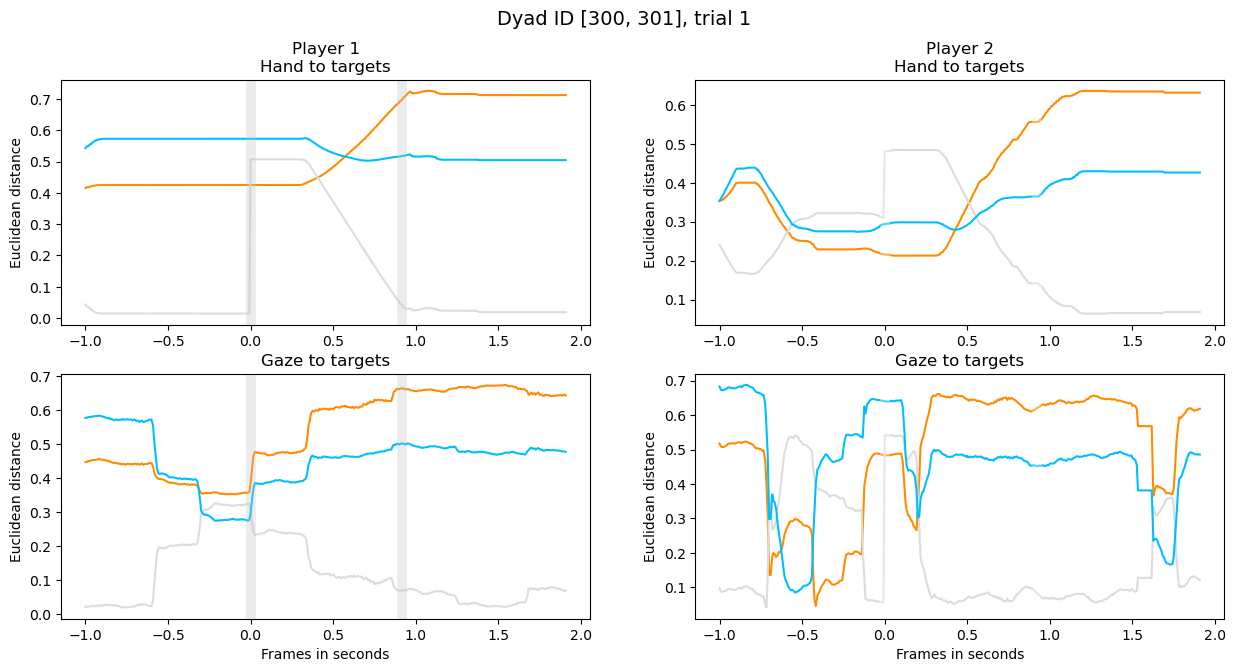

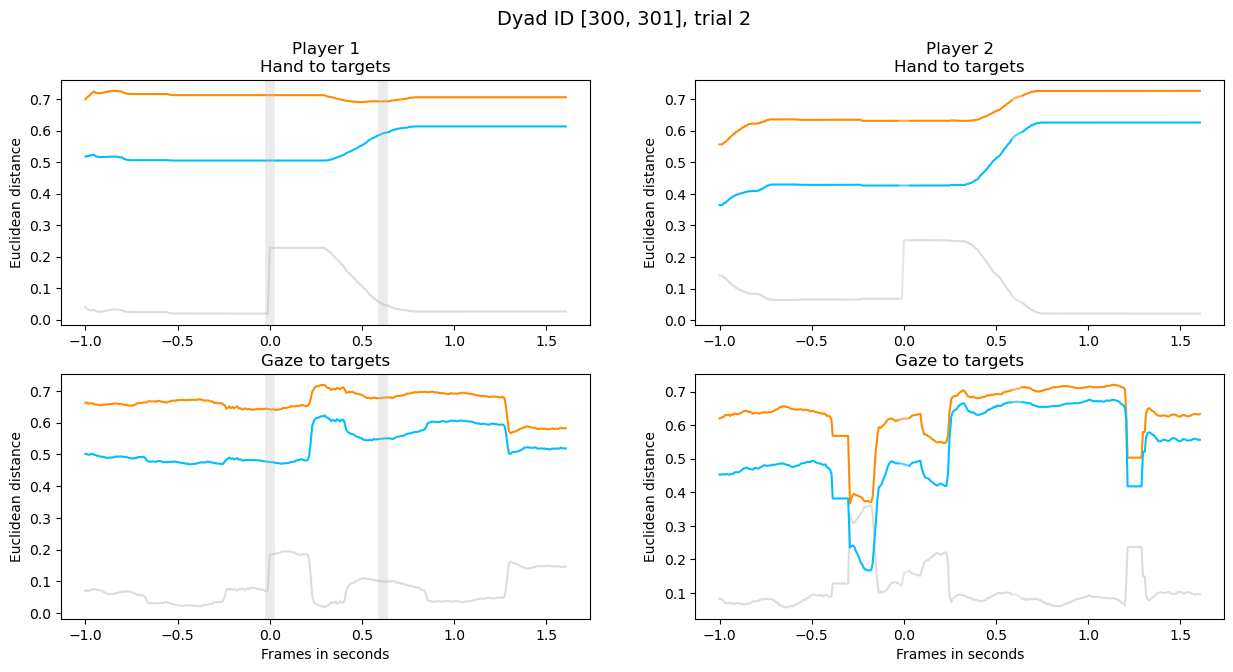

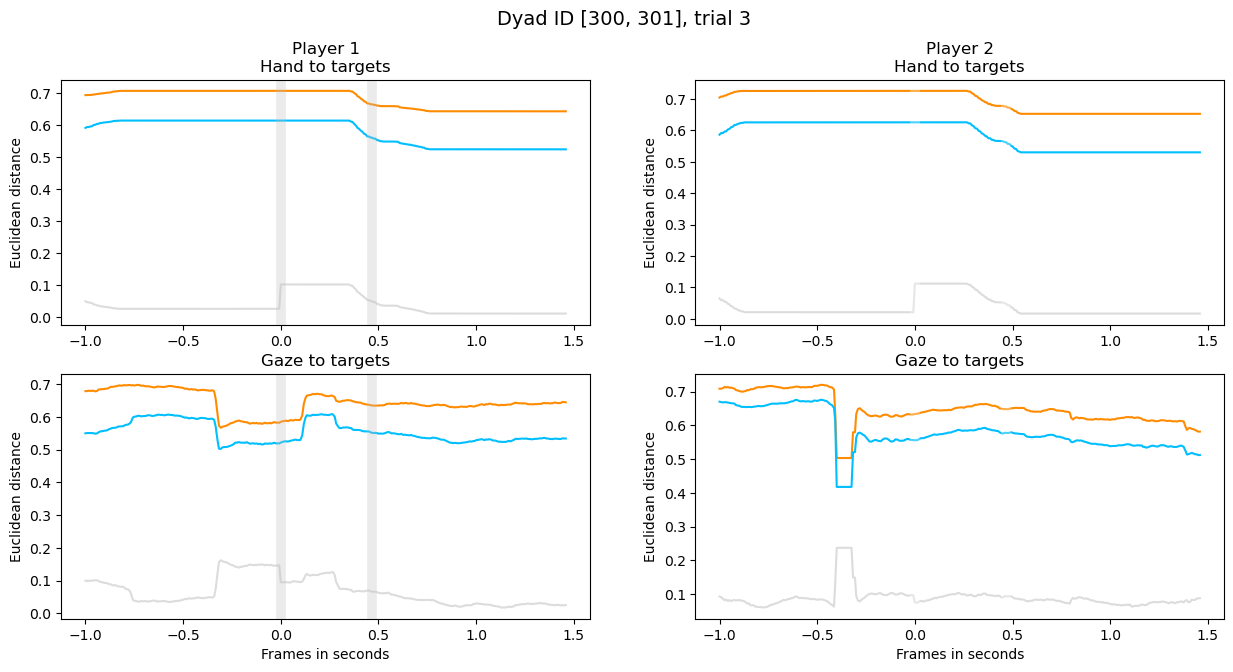

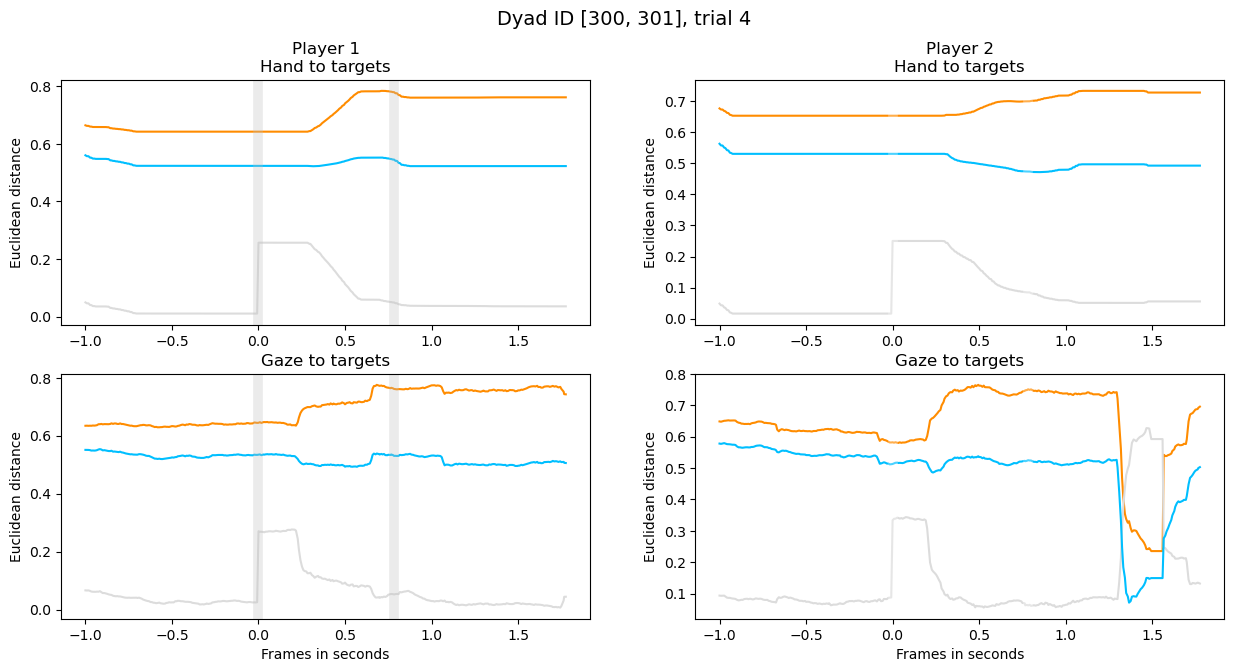

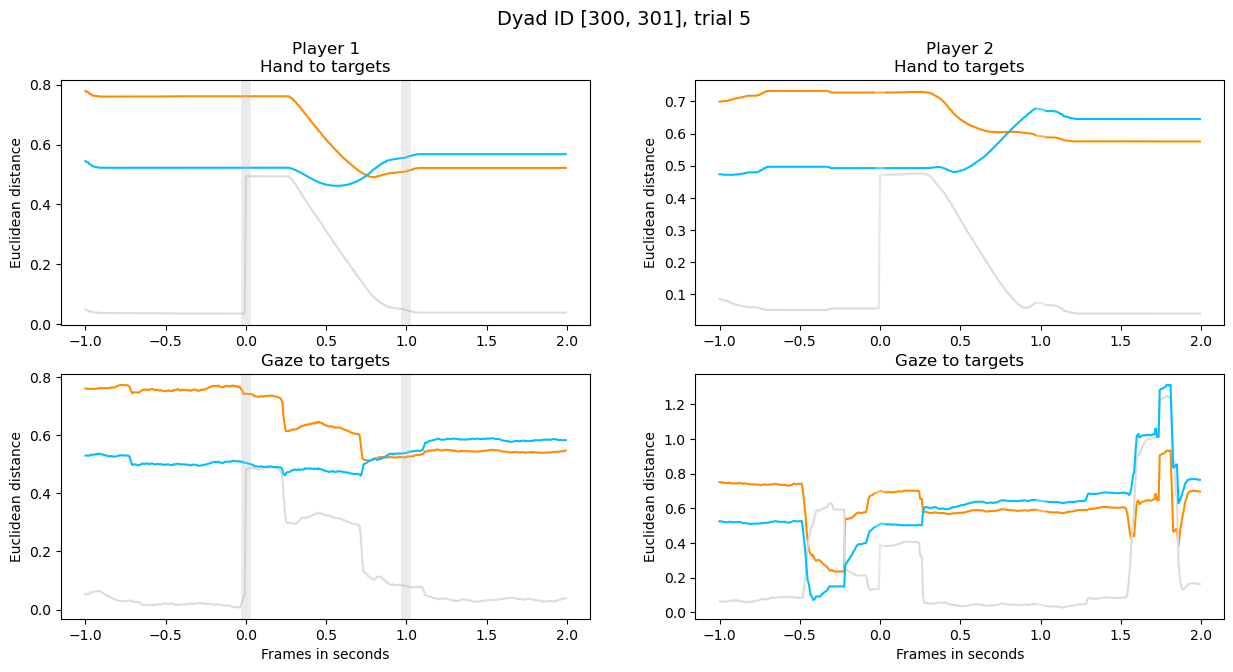

In [8]:
#Figure 1. The code makes plots for single trials
#Set how many trials you want to depict by putting number in "in range(_?_)". You can also get all trials by inserting "trials_number", which is a total number of collections 
for trial_id in range(5):
    #Vertical lines colors
    if trial_end[trial_id] in yellow_joint:
        color_start_0='darkorange'
    elif trial_end[trial_id] in blue_joint:
        color_start_0='deepskyblue'
    elif trial_end[trial_id] in white_p0:
        color_start_0='silver'
    else:
        color_start_0='white'

    if trial_end[trial_id] in yellow_joint:
        color_start='darkorange'
    elif trial_end[trial_id] in blue_joint:
        color_start='deepskyblue'
    elif trial_end[trial_id] in white_p1:
        color_start='silver'
    else:
        color_start='white'
        
    if trial_end[trial_id+1] in yellow_joint:
        color_end_0='darkorange'
    elif trial_end[trial_id+1] in blue_joint:
        color_end_0='deepskyblue'
    elif trial_end[trial_id+1] in white_p0:
        color_end_0='silver'
    else:
        color_end_0='white'

    if trial_end[trial_id+1] in yellow_joint:
        color_end='darkorange'
    elif trial_end[trial_id+1] in blue_joint:
        color_end='deepskyblue'
    elif trial_end[trial_id+1] in white_p1:
        color_end='silver'
    else:
        color_end='white'
        
    plt.figure(figsize=(15, 7))
    plt.subplot(2,2,1) #plt 1-hand player 1/
    plt.title(f'Player 1\nHand to targets')
    plt.ylabel('Euclidean distance')
    frames=records[dyad][block]['timestamp']
    offset = 120
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='darkorange')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='gainsboro')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='deepskyblue')
    plt.axvline(x=0,c=color_start_0, alpha=0.3,linewidth=7.0)
    plt.axvline(x=frames[trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 2,c=color_end_0, alpha=0.3,linewidth=7.0)

    plt.subplot(2,2,2) #plt 2-hand player 2
    plt.title(f'Player 2\nHand to targets')
    plt.ylabel('Euclidean distance')
    frames=records[dyad][block]['timestamp']
    offset = 120
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='darkorange')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='gainsboro')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='deepskyblue')
    plt.axvline(x=0,c=color_start, alpha=0.3,linewidth=7.0)
    plt.axvline(x=frames[trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 2,c=color_end, alpha=0.3,linewidth=7.0)

    plt.subplot(2,2,3) #plt 3-eye player 1
    plt.title(f'Gaze to targets')
    plt.ylabel('Euclidean distance')
    plt.xlabel('Frames in seconds')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='darkorange')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='gainsboro')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='deepskyblue')
    plt.axvline(x=0,c=color_start_0,alpha=0.3,linewidth=7.0)
    plt.axvline(x=frames[trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 2,c=color_end_0,alpha=0.3,linewidth=7.0)

    plt.subplot(2,2,4) #plt 4-eye player 2
    plt.title(f'Gaze to targets')
    plt.ylabel('Euclidean distance')
    plt.xlabel('Frames in seconds')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='darkorange')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='gainsboro')
    plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id+1]],'-',c='deepskyblue')
    plt.axvline(x=0,c=color_start,alpha=0.3,linewidth=7.0)
    plt.axvline(x=frames[trial_end[trial_id+1]] - frames[trial_end[trial_id]-offset] - 2,c=color_end,alpha=0.3,linewidth=7.0)

    plt.suptitle(f'Dyad ID {dyad}, trial {trial_id+1}', fontsize=14)
# you can also automatically save plots by uncommenting savefig function and plt.close. write your own route
    #plt.savefig (f'/Users/aruna.nyssanbay/Documents/LR1/Figures/Dyad2/Dyad ID {dyad}, trial {trial_id+1}.png') 
    #plt.close()

KeyError: 144165

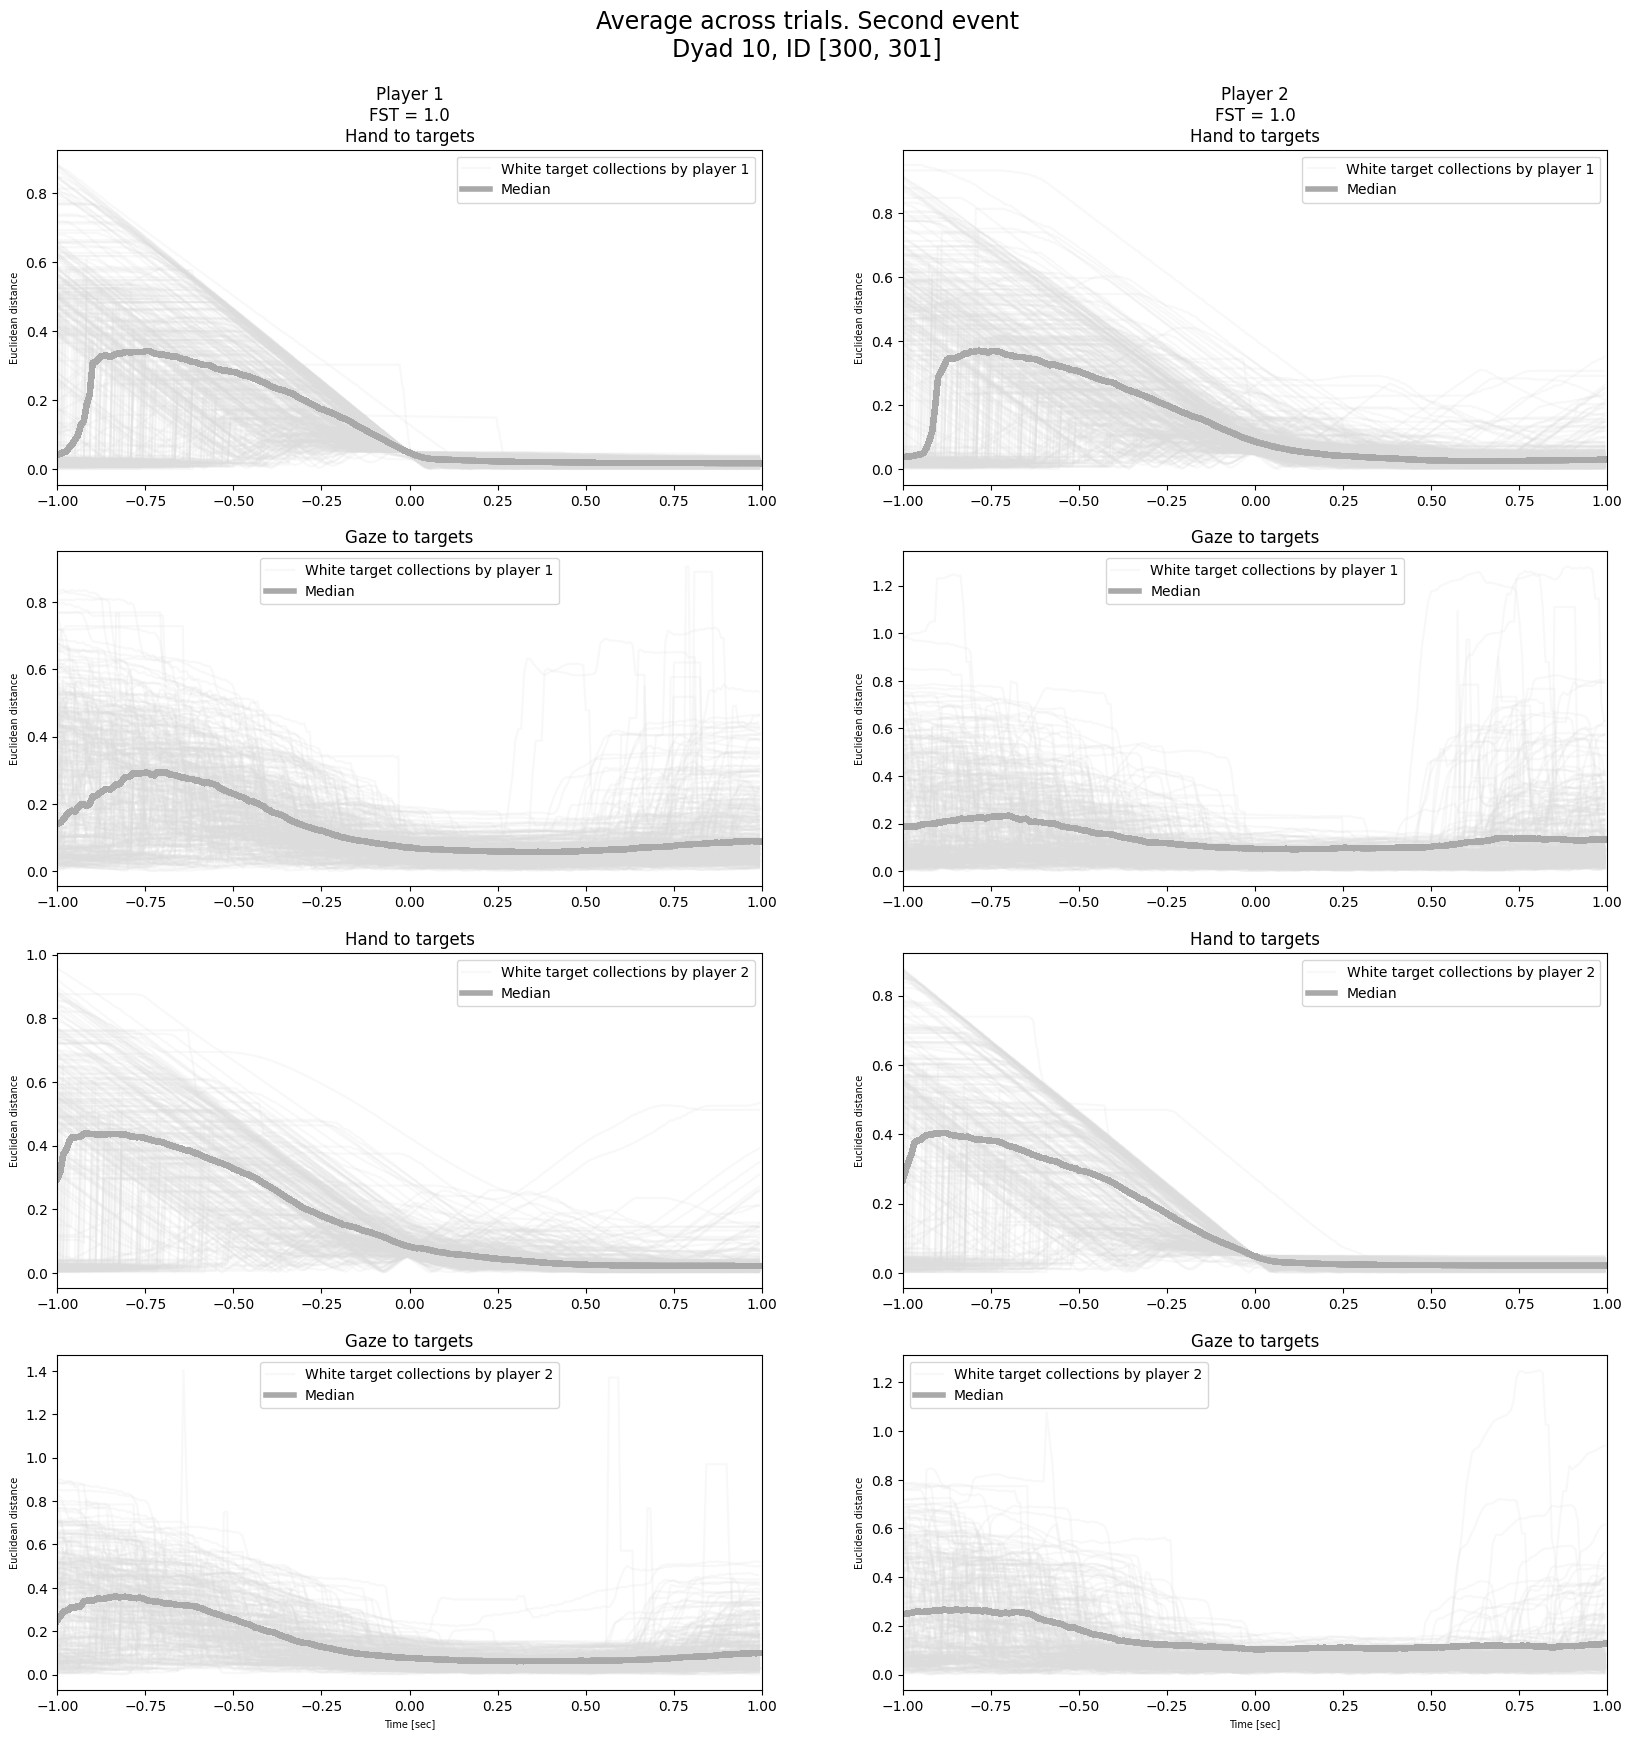

In [118]:
#Figure 2. The code below draws averages across trials within a dyad for event 1 - one second before and after previous target collection
#Setting empty lists:
average_h_bj_0 = []
average_h_bj = []
average_e_bj_0 = []
average_e_bj = []
#Filling the empty lists with filtered trials (for blue collections, yellow, or white):
for id in blue_joint:
    if d1_b1_d_h_bj_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_bj_0.append(d1_b1_d_h_bj_0.iloc[id-2*offset:id])
    if d1_b1_d_h_bj.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_bj.append(d1_b1_d_h_bj.iloc[id-2*offset:id])
    if d1_b1_d_e_bj_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_bj_0.append(d1_b1_d_e_bj_0.iloc[id-2*offset:id])
    if d1_b1_d_e_bj.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_bj.append(d1_b1_d_e_bj.iloc[id-2*offset:id])
#Finding median across trials:
h_bj_0 = np.array(average_h_bj_0)
median_h_bj_0 = np.nanmedian(h_bj_0, axis=0)
h_bj = np.array(average_h_bj)
median_h_bj = np.nanmedian(h_bj, axis=0)
e_bj_0 = np.array(average_e_bj_0)
median_e_bj_0 = np.nanmedian(e_bj_0, axis=0)
e_bj = np.array(average_e_bj)
median_e_bj = np.nanmedian(e_bj, axis=0)

average_h_oj_0 = []
average_h_oj = []
average_e_oj_0 = []
average_e_oj = []
for id in yellow_joint:
    if d1_b1_d_h_oj_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_oj_0.append(d1_b1_d_h_oj_0.iloc[id-2*offset:id])
    if d1_b1_d_h_oj.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_oj.append(d1_b1_d_h_oj.iloc[id-2*offset:id])
    if d1_b1_d_e_oj_0.iloc[id-2*offset:id].max()<2**(1/2):
       
        average_e_oj_0.append(d1_b1_d_e_oj_0.iloc[id-2*offset:id])
    if d1_b1_d_e_oj.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_oj.append(d1_b1_d_e_oj.iloc[id-2*offset:id])
h_oj_0 = np.array(average_h_oj_0)
median_h_oj_0 = np.nanmedian(h_oj_0, axis=0)
h_oj = np.array(average_h_oj)
median_h_oj = np.nanmedian(h_oj, axis=0)
e_oj_0 = np.array(average_e_oj_0)
median_e_oj_0 = np.nanmedian(e_oj_0, axis=0)
e_oj = np.array(average_e_oj)
median_e_oj = np.nanmedian(e_oj, axis=0)

average_h_w_0 = []
average_h_w = []
average_e_w_0 = []
average_e_w = []
for id in white_p0:
    if d1_b1_d_h_w_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_w_0.append(d1_b1_d_h_w_0.iloc[id-2*offset:id])
    if d1_b1_d_h_w.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_w.append(d1_b1_d_h_w.iloc[id-2*offset:id])
    if d1_b1_d_e_w_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_w_0.append(d1_b1_d_e_w_0.iloc[id-2*offset:id])
    if d1_b1_d_e_w.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_w.append(d1_b1_d_e_w.iloc[id-2*offset:id])
h_w_0 = np.array(average_h_w_0)
median_h_w_0 = np.nanmedian(h_w_0, axis=0)
h_w = np.array(average_h_w)
median_h_w = np.nanmedian(h_w, axis=0)
e_w_0 = np.array(average_e_w_0)
median_e_w_0 = np.nanmedian(e_w_0, axis=0)
e_w = np.array(average_e_w)
median_e_w=np.nanmedian(e_w, axis=0)

average_h_w_0_p1 = []
average_h_w_p1 = []
average_e_w_0_p1= []
average_e_w_p1 = []
for id in white_p1:
    if d1_b1_d_h_w_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_w_0_p1.append(d1_b1_d_h_w_0.iloc[id-2*offset:id])
    if d1_b1_d_h_w.iloc[id-2*offset:id].max()<2**(1/2):
        average_h_w_p1.append(d1_b1_d_h_w.iloc[id-2*offset:id])
    if d1_b1_d_e_w_0.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_w_0_p1.append(d1_b1_d_e_w_0.iloc[id-2*offset:id])
    if d1_b1_d_e_w.iloc[id-2*offset:id].max()<2**(1/2):
        average_e_w_p1.append(d1_b1_d_e_w.iloc[id-2*offset:id])
h_w_0_p1 = np.array(average_h_w_0_p1)
median_h_w_0_p1 = np.nanmedian(h_w_0_p1, axis=0)
h_w_p1 = np.array(average_h_w_p1)
median_h_w_p1= np.nanmedian(h_w_p1, axis=0)
e_w_0_p1 = np.array(average_e_w_0_p1)
median_e_w_0_p1 = np.nanmedian(e_w_0_p1, axis=0)
e_w_p1 = np.array(average_e_w_p1)
median_e_w_p1 = np.nanmedian(e_w_p1, axis=0)
#In games 10 and 14 only white targets were collected (FST=1.0). Therefore we don't have values for blue and yellow collections and exclude those from pl
if game==10 or game==14:
    plt.figure(figsize=(20, 20))
    plt.suptitle(f'Average across trials. Second event\nDyad {game}, ID {dyad}',y=0.95,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in white_p0:
            plt.subplot(4,2,1)
            plt.title(f'Player 1\nFST = {FST_player1}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        
            plt.subplot(4,2,2)
            plt.title(f'Player 2\nFST = {FST_player2}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        
            plt.subplot(4,2,3)
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)
            
            plt.subplot(4,2,4)
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)

        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(4,2,5)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)    
     
            plt.subplot(4,2,6)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1) 
       
            plt.subplot(4,2,7)
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1) 
            plt.xlabel('Time [sec]',fontsize=7)
     
            plt.subplot(4,2,8)
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1) 
            plt.xlabel('Time [sec]',fontsize=7)
else: 
    plt.figure(figsize=(20, 30))
    plt.suptitle(f'Average across trials. Second event\nDyad {game}, ID {dyad}',y=0.93,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in blue_joint:
            plt.subplot(8,2,1)
            plt.title(f'Player 1\nFST = {FST_player1}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_bj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='deepskyblue',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj_0,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        
            plt.subplot(8,2,2)
            plt.title(f'Player 2\nFST = {FST_player2}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_bj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='deepskyblue',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
       
            plt.subplot(8,2,3)
            if d1_b1_d_e_bj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_bj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='deepskyblue',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj_0,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)
       
            plt.subplot(8,2,4)
            if d1_b1_d_e_bj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_bj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='deepskyblue',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)

        elif trial_end[trial_id+1] in yellow_joint:
            plt.subplot(8,2,5)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_oj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='darkorange',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj_0,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)
            
            plt.subplot(8,2,6)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_oj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='darkorange',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)
           
            plt.subplot(8,2,7)
            if d1_b1_d_e_oj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_oj_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='darkorange',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj_0,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)
           
            plt.subplot(8,2,8)
            if d1_b1_d_e_oj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_oj.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='darkorange',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)

        elif trial_end[trial_id+1] in white_p0:
            plt.subplot(8,2,9)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)
            
            plt.subplot(8,2,10)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)
            
            plt.subplot(8,2,11)
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0,c='darkgrey',linewidth=4.0)
            plt.xlim(-1,1)
            plt.title(f'Gaze to targets')
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.legend(['White target collections by player 1','Median'])

            plt.subplot(8,2,12)
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)
        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(8,2,13)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1)    
            
            plt.subplot(8,2,14)
            plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.title(f'Hand to targets')
            plt.xlim(-1,1) 
      
            plt.subplot(8,2,15)
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1) 
       
            plt.subplot(8,2,16)
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]] - frames[trial_end[trial_id+1]-2*offset]-1,d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]],'-',c='gainsboro',alpha=0.7)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_p1,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.title(f'Gaze to targets')
            plt.xlim(-1,1)


ValueError: x and y must have same first dimension, but have shapes (121,) and (240,)

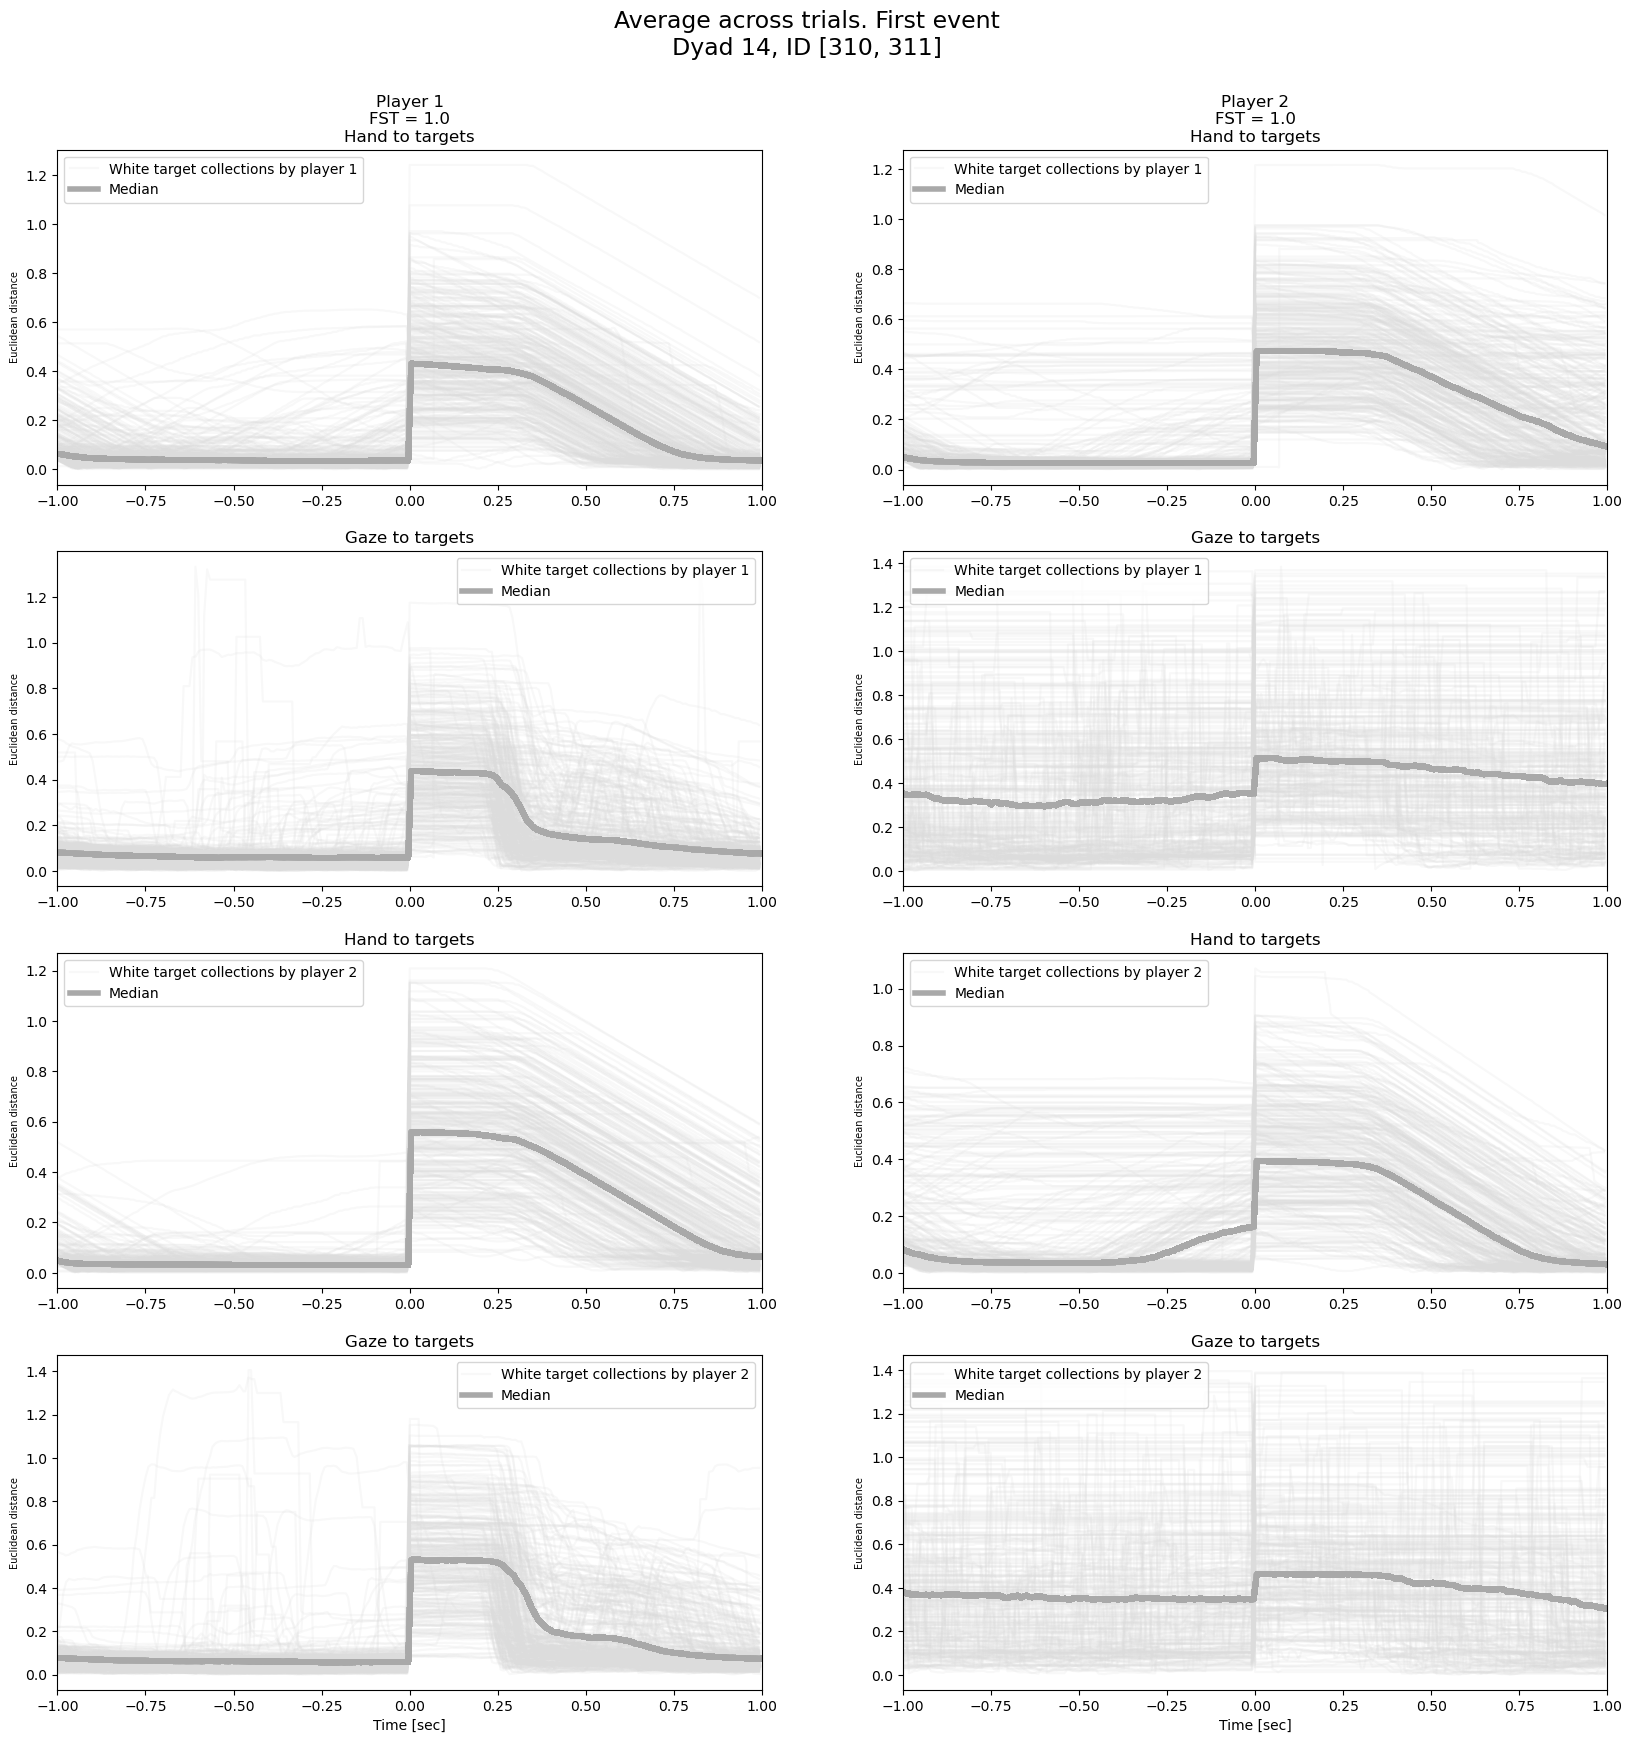

In [27]:
#Figure 3. This code draws averages across trials within a dyad for event one - 1 sec before and 1 second after previous collection
average_h_bj_s = []
average_h_bj_0_s = []
average_e_bj_0_s = []
average_e_bj_s = []
average_h_oj_0_s = []
average_h_oj_s = []
average_e_oj_0_s = []
average_e_oj_s = []
average_h_w_0_s = []
average_h_w_s = []
average_e_w_0_s = []
average_e_w_s = []
average_h_w_0_p1_s = []
average_h_w_p1_s = []
average_e_w_0_p1_s= []
average_e_w_p1_s = []
for trial_id in range(trials_number-1):
    if trial_end[trial_id+1] in blue_joint: 
        if d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_bj_0_s.append(d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_bj_s.append(d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in blue_joint and d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_bj_0_s.append(d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in blue_joint and d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_bj_s.append(d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in yellow_joint: 
        if d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_oj_0_s.append(d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_oj_s.append(d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_oj_0_s.append(d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_oj_s.append(d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in white_p0:
        if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_0_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_0_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in white_p1:
        if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_0_p1_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_p1_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_0_p1_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_p1_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
#Blue
h_bj_0_s = np.array(average_h_bj_0_s)
median_h_bj_0_s = np.nanmedian(h_bj_0_s, axis=0)
h_bj_s = np.array(average_h_bj_0_s)
median_h_bj_s = np.nanmedian(h_bj_s, axis=0)
e_bj_0_s = np.array(average_e_bj_0_s)
median_e_bj_0_s = np.nanmedian(e_bj_0_s, axis=0)
e_bj_s = np.array(average_e_bj_s)
median_e_bj_s = np.nanmedian(e_bj_s, axis=0)
#Yellow
h_oj_0_s = np.array(average_h_oj_0_s)
median_h_oj_0_s = np.nanmedian(h_oj_0_s, axis=0)
h_oj_s = np.array(average_h_oj_s)
median_h_oj_s = np.nanmedian(h_oj_s, axis=0)
e_oj_0_s = np.array(average_e_oj_0_s)
median_e_oj_0_s = np.nanmedian(e_oj_0_s, axis=0)
e_oj_s = np.array(average_e_oj_s)
median_e_oj_s = np.nanmedian(e_oj_s, axis=0)
#white - Player 1
h_w_0_s = np.array(average_h_w_0_s)
median_h_w_0_s = np.nanmedian(h_w_0_s, axis=0)
h_w_s = np.array(average_h_w_s)
median_h_w_s = np.nanmedian(h_w_s, axis=0)
e_w_0_s = np.array(average_e_w_0_s)
median_e_w_0_s = np.nanmedian(e_w_0_s, axis=0)
e_w_s = np.array(average_e_w_s)
median_e_w_s = np.nanmedian(e_w_s, axis=0)
#white - Player 2
h_w_0_p1_s = np.array(average_h_w_0_p1_s)
median_h_w_0_p1_s = np.nanmedian(h_w_0_p1_s, axis=0)
h_w_p1_s = np.array(average_h_w_p1_s)
median_h_w_p1_s= np.nanmedian(h_w_p1_s, axis=0)
e_w_0_p1_s=np.array(average_e_w_0_p1_s)
median_e_w_0_p1_s = np.nanmedian(e_w_0_p1_s, axis=0)
e_w_p1_s = np.array(average_e_w_p1_s)
median_e_w_p1_s = np.nanmedian(e_w_p1_s, axis=0)
if game==10 or game==14:
    plt.figure(figsize=(20, 20))
    plt.suptitle(f'Average across trials. First event\nDyad {game}, ID {dyad}',y=0.95,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in white_p0:
            plt.subplot(4,2,1)
            plt.title(f'Player 1\nFST = {FST_player1}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(4,2,2)
            plt.title(f'Player 2\nFST = {FST_player2}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(4,2,3)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(4,2,4)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(4,2,5)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(4,2,6)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(4,2,7)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.xlim(-1,1)
            plt.subplot(4,2,8)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.xlim(-1,1)
else: 
    plt.figure(figsize=(20, 30))
    plt.suptitle(f'Average across trials. First event\nDyad {game}, ID {dyad}',y=0.93,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in blue_joint:
            plt.subplot(8,2,1)
            plt.title(f'Player 1\nFST = {FST_player1}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj_0_s,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,2)
            plt.title(f'Player 2\nFST = {FST_player2}\nHand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj_s,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,3)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj_0_s,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,4)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj_s,c='royalblue',linewidth=4.0)
            plt.legend(['Blue target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        elif trial_end[trial_id+1] in yellow_joint:

            plt.subplot(8,2,5)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj_0_s,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,6)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.1)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj_s,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,7)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj_0_s,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,8)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.1)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj_s,c='chocolate',linewidth=4.0)
            plt.legend(['Yellow target collections','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        elif trial_end[trial_id+1] in white_p0:
            plt.subplot(8,2,9)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,10)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,11)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,12)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 1','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(8,2,13)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,14)
            plt.title(f'Hand to targets')
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            plt.subplot(8,2,15)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.xlim(-1,1)
            plt.subplot(8,2,16)
            plt.title(f'Gaze to targets')
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
                plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_p1_s,c='darkgrey',linewidth=4.0)
            plt.legend(['White target collections by player 2','Median'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlabel('Time [sec]')
            plt.xlim(-1,1)
    

Dyad 9 is excluded for technical reasons


Text(0.5, -14.277777777777832, 'Time [sec]')

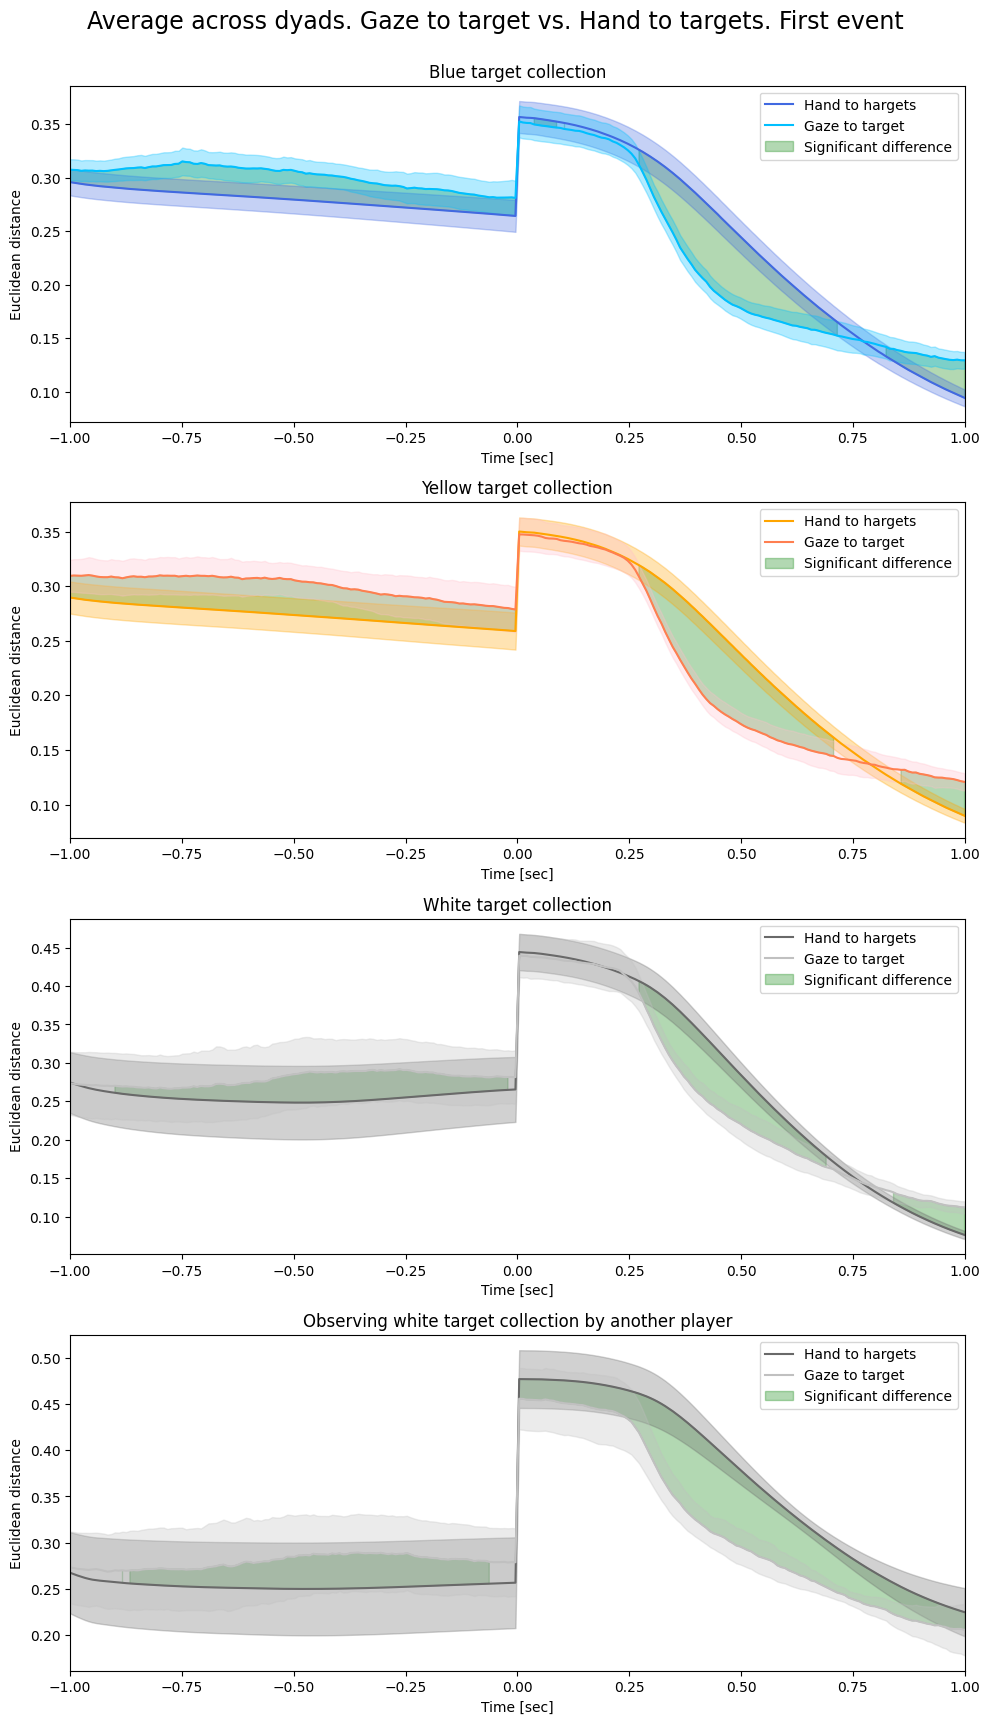

In [114]:
#Figure 4. Average of averages (all 26 subjects analysis)
import scipy.stats as stats
average_h_bj_0_1_s = []
average_e_bj_0_1_s = []
average_h_oj_0_1_s = []
average_e_oj_0_1_s = []
average_h_w_0_1_s = []
average_e_w_0_1_s = []
average_h_w_0_1_s_observing = []
average_e_w_0_1_s_observing = []
h_blue_all=[]
e_blue_all = []
h_orange_all=[]
e_orange_all = []
h_white_all=[]
e_white_all = []
h_white_all_observing=[]
e_white_all_observing = []
#Here we run over all 13 dyads (26 subjects) and do similar calculations as for average within a dyad
#Dyad 9 has mistakes therefore is it excluded from analysis
for game in range(1,15):
    if game==1:
        dyad='[100, 101]'
    elif game==2:
        dyad='[102, 103]'
    elif game==3:
        dyad='[104, 105]'
    elif game==4:
        dyad='[200, 201]'
    elif game==5:
        dyad='[202, 203]'
    elif game==6:
        dyad='[204, 205]'
    elif game==7:
        dyad='[206, 207]'
    elif game==8:
        dyad='[208, 209]'
    elif game==9:
        print('Dyad 9 is excluded for technical reasons')
    elif game==10:
        dyad='[300, 301]'
    elif game==11:
        dyad='[304, 305]'
    elif game==12:
        dyad='[306, 307]'
    elif game==13:
        dyad='[308, 309]'
    elif game==14:
        dyad='[310, 311]'
    else:
        print('Choose dyad from 1 to 14')
    if len(records[dyad].keys())==3:  
        d1_b1=[records[dyad][1], records[dyad][2], records[dyad][3]]
        d1_b1=pd.concat(d1_b1)
    elif len(records[dyad].keys())==2:
        d1_b1=[records[dyad][1], records[dyad][2]]
        d1_b1=pd.concat(d1_b1)
    
    d1_b1_d_h_w_0=((d1_b1['p0_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
    d1_b1_d_h_oj_0=((d1_b1['p0_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_h_bj_0=((d1_b1['p0_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
    d1_b1_d_e_w_0=((d1_b1['p0_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
    d1_b1_d_e_oj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_e_bj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)

    d1_b1_d_h_w=((d1_b1['p1_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
    d1_b1_d_h_oj=((d1_b1['p1_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_h_bj=((d1_b1['p1_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
    d1_b1_d_e_w=((d1_b1['p1_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
    d1_b1_d_e_oj=((d1_b1['p1_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_e_bj=((d1_b1['p1_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)
    sum_c=d1_b1['comp_collected_by_p0']+d1_b1['comp_collected_by_p1'] + d1_b1['coop0_collected']+d1_b1['coop1_collected']  
    trial_end=list(np.where(sum_c>0)[0])
    trials_number=len(trial_end)
    white_p0=list(np.where(d1_b1['comp_collected_by_p0']>0)[0])
    white_p1=list(np.where(d1_b1['comp_collected_by_p1']>0)[0])
    blue_joint=list(np.where(d1_b1['coop0_collected']>0)[0])
    yellow_joint=list(np.where(d1_b1['coop1_collected']>0)[0])
    for trial_id in range(trials_number-1):
        #blue
        if trial_end[trial_id+1] in blue_joint:
            if d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_bj_0_1_s.append(d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_bj_0_1_s.append(d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_bj_0_1_s.append(d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_bj_0_1_s.append(d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        #yellow
        if trial_end[trial_id+1] in yellow_joint:
            if d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_oj_0_1_s.append(d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_oj_0_1_s.append(d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_oj_0_1_s.append(d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_oj_0_1_s.append(d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        #white collected 
        if trial_end[trial_id+1] in white_p0: 
            if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_w_0_1_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_w_0_1_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in white_p1: 
            if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_w_0_1_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_w_0_1_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    #obsering white collection
        if trial_end[trial_id+1] in white_p0:
            if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_w_0_1_s_observing.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_w_0_1_s_observing.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in white_p1:
            if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_h_w_0_1_s_observing.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                average_e_w_0_1_s_observing.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            
    h_blue = np.array(average_h_bj_0_1_s)
    average_h_blue = np.nanmean(h_blue, axis=0)
    h_blue_all.append(average_h_blue)
    
    e_blue = np.array(average_e_bj_0_1_s)
    average_e_blue = np.nanmean(e_blue, axis=0)
    e_blue_all.append(average_e_blue)
    
    h_orange = np.array(average_h_oj_0_1_s)
    average_h_orange = np.nanmean(h_orange, axis=0)
    h_orange_all.append(average_h_orange)
    
    e_orange = np.array(average_e_oj_0_1_s)
    average_e_orange = np.nanmean(e_orange, axis=0)
    e_orange_all.append(average_e_orange)
    
    h_white = np.array(average_h_w_0_1_s)
    average_h_white = np.nanmean(h_white, axis=0)
    h_white_all.append(average_h_white)
    
    e_white = np.array(average_e_w_0_1_s)
    average_e_white = np.nanmean(e_white, axis=0)
    e_white_all.append(average_e_white)
    
    h_white_observing = np.array(average_h_w_0_1_s_observing)
    average_h_white_observing = np.nanmean(h_white_observing, axis=0)
    h_white_all_observing.append(average_h_white_observing)
    
    e_white_observing = np.array(average_e_w_0_1_s_observing)
    average_e_white_observing = np.nanmean(e_white_observing, axis=0)
    e_white_all_observing.append(average_e_white_observing)
#Below we find mean of means. Means for each dyad was accumulated in the code above
h_blue_all=np.array(h_blue_all) 
average_h_blue_all = np.nanmean(h_blue_all, axis=0)
h_blue_std=np.nanstd(h_blue_all, axis=0)

e_blue_all=np.array(e_blue_all)
average_e_blue_all = np.nanmean(e_blue_all, axis=0)
e_blue_std=np.nanstd(e_blue_all, axis=0)

h_orange_all=np.array(h_orange_all) 
average_h_orange_all = np.nanmean(h_orange_all, axis=0)
h_orange_std=np.nanstd(h_orange_all, axis=0)

e_orange_all=np.array(e_orange_all)
average_e_orange_all = np.nanmean(e_orange_all, axis=0)
e_orange_std=np.nanstd(e_orange_all, axis=0)

h_white_all=np.array(h_white_all) 
average_h_white_all = np.nanmean(h_white_all, axis=0)
h_white_std=np.nanstd(h_white_all, axis=0)

e_white_all=np.array(e_white_all)
average_e_white_all = np.nanmean(e_white_all, axis=0)
e_white_std=np.nanstd(e_white_all, axis=0)

h_white_all_observing=np.array(h_white_all_observing) 
average_h_white_all_observing = np.nanmean(h_white_all_observing, axis=0)
h_white_std_observing=np.nanstd(h_white_all_observing, axis=0)

e_white_all_observing=np.array(e_white_all_observing)
average_e_white_all_observing = np.nanmean(e_white_all_observing, axis=0)
e_white_std_observing=np.nanstd(e_white_all_observing, axis=0)

alpha = 0.05/240

plt.figure(figsize=(10, 17))
plt.suptitle(f'Average across dyads. Gaze to target vs. Hand to targets. First event',y=1.0,fontsize=17)

plt.subplot(4,1,1)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), average_h_blue_all, color='royalblue', label='Mean Hand')
plt.plot(np.linspace(-1, 1, 2*offset), average_e_blue_all, label='Mean Gaze', color='deepskyblue')
# Shaded SE bands
p_values_blue = np.array([stats.ttest_rel(h_blue_all[:, i], e_blue_all[:, i]).pvalue for i in range(2*offset)])
significant_points_blue = p_values_blue < alpha
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_blue_all, average_e_blue_all, where=significant_points_blue, color='green', alpha=0.3, label='Significant Difference')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_blue_all-h_blue_std, average_h_blue_all+h_blue_std, color='royalblue', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), average_e_blue_all-e_blue_std, average_e_blue_all+e_blue_std, color='deepskyblue', alpha=0.3)
# Figure style
plt.title(f'Blue target collection')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to target','Significant difference'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,2)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), average_h_orange_all, label='Mean Hand', color='orange')
plt.plot(np.linspace(-1, 1, 2*offset), average_e_orange_all, label='Mean Gaze', color='coral')
# Shaded area for significant differences
p_values_orange = np.array([stats.ttest_rel(h_orange_all[:, i], e_orange_all[:, i]).pvalue for i in range(2*offset)])
significant_points_orange = p_values_orange < alpha
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_orange_all, average_e_orange_all, where=significant_points_orange, color='green', alpha=0.3, label='Significant Difference')
# Shaded SE bands
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_orange_all-h_orange_std, average_h_orange_all+h_orange_std, color='orange', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), average_e_orange_all-e_orange_std, average_e_orange_all+e_orange_std, color='pink', alpha=0.3)
# Figure style
plt.title(f'Yellow target collection')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to target','Significant difference'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), average_h_white_all, label='Mean Hand', color='dimgrey')
plt.plot(np.linspace(-1, 1, 2*offset), average_e_white_all, label='Mean Gaze', color='silver')
# Shaded SE bands
p_values_white = np.array([stats.ttest_rel(h_white_all[:, i], e_white_all[:, i]).pvalue for i in range(2*offset)])
significant_points_white = p_values_white < alpha
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_white_all, average_e_white_all, where=significant_points_white, color='green', alpha=0.3, label='Significant Difference')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_white_all-h_white_std, average_h_white_all+h_white_std, color='dimgrey', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), average_e_white_all-e_white_std, average_e_white_all+e_white_std, color='silver', alpha=0.3)
# Figure style
plt.title(f'White target collection')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to target','Significant difference'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,4)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), average_h_white_all_observing, label='Mean Hand', color='dimgrey')
plt.plot(np.linspace(-1, 1, 2*offset), average_e_white_all_observing, label='Mean Gaze', color='silver')
# Shaded SE bands
p_values_white_o = np.array([stats.ttest_rel(h_white_all_observing[:, i], e_white_all_observing[:, i]).pvalue for i in range(2*offset)])
significant_points_white_o = p_values_white_o < alpha
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_white_all_observing, average_e_white_all_observing, where=significant_points_white_o, color='green', alpha=0.3, label='Significant Difference')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), average_h_white_all_observing-h_white_std_observing, average_h_white_all_observing+h_white_std_observing, color='dimgrey', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), average_e_white_all_observing-e_white_std_observing, average_e_white_all_observing+e_white_std_observing, color='silver', alpha=0.3)
# Figure style
plt.title(f'Observing white target collection by another player')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to target','Significant difference'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

Dyad 9 is excluded for technical reasons


/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/4221467387.py:161: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 810.9166666666669, 'Time [sec]')

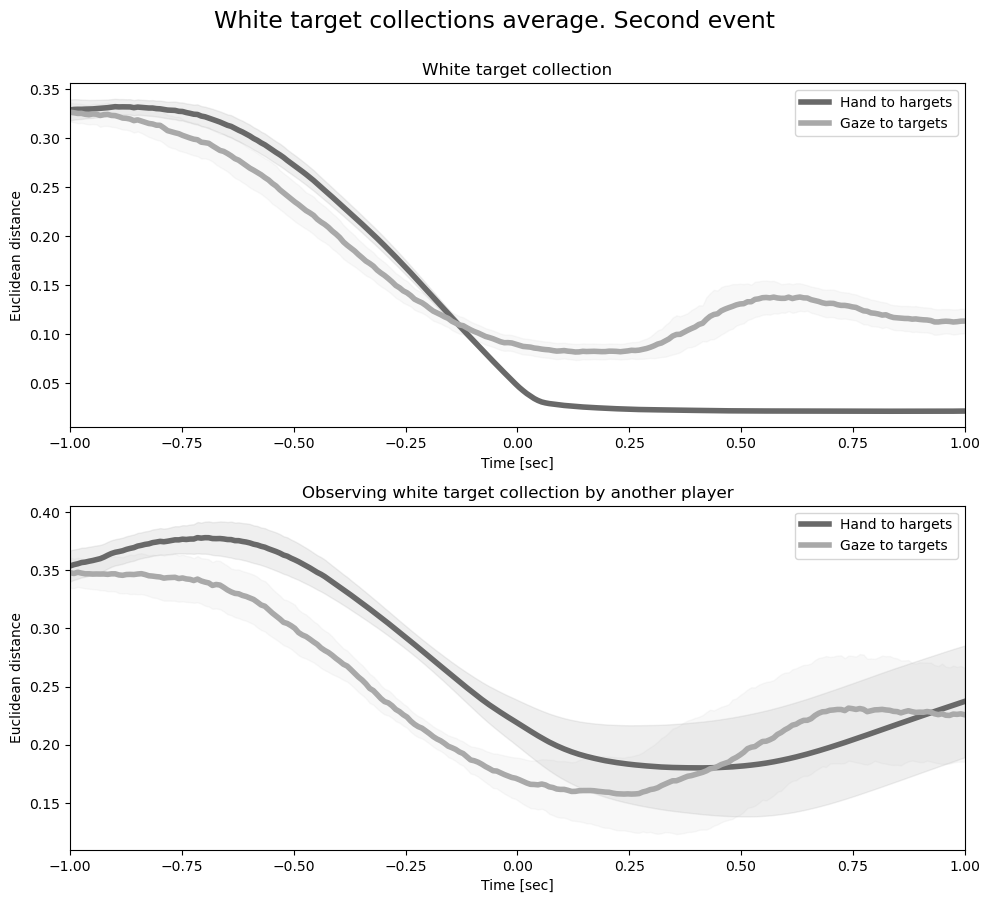

In [10]:
#Figure 5. Observing white target collection (second event)
import scipy.stats as stats
mean_h_w_0_1_s = []
mean_e_w_0_1_s = []
mean_h_w_0_1_s_observing = []
mean_e_w_0_1_s_observing = []
h_white_all=[]
e_white_all = []
h_white_all_observing=[]
e_white_all_observing = []
#Here we run over all 13 dyads (26 subjects) and do similar calculations as for average within a dyad
#Dyad 9 has mistakes therefore is it excluded from analysis
for game in range(1,15):
    if game==1:
        dyad='[100, 101]'
    elif game==2:
        dyad='[102, 103]'
    elif game==3:
        dyad='[104, 105]'
    elif game==4:
        dyad='[200, 201]'
    elif game==5:
        dyad='[202, 203]'
    elif game==6:
        dyad='[204, 205]'
    elif game==7:
        dyad='[206, 207]'
    elif game==8:
        dyad='[208, 209]'
    elif game==9:
        print('Dyad 9 is excluded for technical reasons')
    elif game==10:
        dyad='[300, 301]'
    elif game==11:
        dyad='[304, 305]'
    elif game==12:
        dyad='[306, 307]'
    elif game==13:
        dyad='[308, 309]'
    elif game==14:
        dyad='[310, 311]'
    else:
        print('Choose dyad from 1 to 14')
    if len(records[dyad].keys())==3:  
        d1_b1=[records[dyad][1], records[dyad][2], records[dyad][3]]
        d1_b1=pd.concat(d1_b1)
    elif len(records[dyad].keys())==2:
        d1_b1=[records[dyad][1], records[dyad][2]]
        d1_b1=pd.concat(d1_b1)
    
    d1_b1_d_h_w_0=((d1_b1['p0_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
    d1_b1_d_h_oj_0=((d1_b1['p0_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_h_bj_0=((d1_b1['p0_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
    d1_b1_d_e_w_0=((d1_b1['p0_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
    d1_b1_d_e_oj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_e_bj_0=((d1_b1['p0_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p0_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)

    d1_b1_d_h_w=((d1_b1['p1_agent_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['comp_y'])**2)**(1/2)#hand/cursor to targets
    d1_b1_d_h_oj=((d1_b1['p1_agent_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_h_bj=((d1_b1['p1_agent_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['coop0_y'])**2)**(1/2)
    d1_b1_d_e_w=((d1_b1['p1_gaze_x'] - d1_b1['comp_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['comp_y'])**2)**(1/2)#eye to targets
    d1_b1_d_e_oj=((d1_b1['p1_gaze_x'] - d1_b1['coop1_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop1_y'])**2)**(1/2)
    d1_b1_d_e_bj=((d1_b1['p1_gaze_x'] - d1_b1['coop0_x'])**2+(d1_b1['p1_gaze_y'] - d1_b1['coop0_y'])**2)**(1/2)
    sum_c=d1_b1['comp_collected_by_p0']+d1_b1['comp_collected_by_p1'] + d1_b1['coop0_collected']+d1_b1['coop1_collected']  
    trial_end=list(np.where(sum_c>0)[0])
    trials_number=len(trial_end)
    white_p0=list(np.where(d1_b1['comp_collected_by_p0']>0)[0])
    white_p1=list(np.where(d1_b1['comp_collected_by_p1']>0)[0])
    blue_joint=list(np.where(d1_b1['coop0_collected']>0)[0])
    yellow_joint=list(np.where(d1_b1['coop1_collected']>0)[0])
    for trial_id in range(trials_number-1):
        #white collected 
        if trial_end[trial_id+1] in white_p0: 
            if d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_h_w_0_1_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_e_w_0_1_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
        if trial_end[trial_id+1] in white_p1: 
            if d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_h_w_0_1_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                                
                mean_e_w_0_1_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
    #observing white collection
        if trial_end[trial_id+1] in white_p0:
            if d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_h_w_0_1_s_observing.append(d1_b1_d_h_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_e_w_0_1_s_observing.append(d1_b1_d_e_w.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
        if trial_end[trial_id+1] in white_p1:
            if d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_h_w_0_1_s_observing.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                mean_e_w_0_1_s_observing.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            
    h_white = np.array(mean_h_w_0_1_s)
    mean_h_white = np.nanmean(h_white, axis=0)
    h_white_all.append(mean_h_white)
    
    e_white = np.array(mean_e_w_0_1_s)
    mean_e_white = np.nanmean(e_white, axis=0)
    e_white_all.append(mean_e_white)
    
    h_white_observing = np.array(mean_h_w_0_1_s_observing)
    mean_h_white_observing = np.nanmean(h_white_observing, axis=0)
    h_white_all_observing.append(mean_h_white_observing)
    
    e_white_observing = np.array(mean_e_w_0_1_s_observing)
    mean_e_white_observing = np.nanmean(e_white_observing, axis=0)
    e_white_all_observing.append(mean_e_white_observing)
#Below we find mean of means. Means for each dyad was accumulated in the code above
h_white_all=np.array(h_white_all) 
mean_h_white_all = np.nanmean(h_white_all, axis=0)
h_white_std=np.nanstd(h_white_all, axis=0)

e_white_all=np.array(e_white_all)
mean_e_white_all = np.nanmean(e_white_all, axis=0)
e_white_std=np.nanstd(e_white_all, axis=0)

h_white_all_observing=np.array(h_white_all_observing) 
mean_h_white_all_observing = np.nanmean(h_white_all_observing, axis=0)
h_white_std_observing=np.nanstd(h_white_all_observing, axis=0)

e_white_all_observing=np.array(e_white_all_observing)
mean_e_white_all_observing = np.nanmean(e_white_all_observing, axis=0)
e_white_std_observing=np.nanstd(e_white_all_observing, axis=0)

alpha = 0.05/240

plt.figure(figsize=(10, 17))
plt.suptitle(f'White target collections average. Second event',y=1.0,fontsize=17)


plt.subplot(4,1,1)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_h_white_all, label='Mean Hand', color='dimgrey',linewidth=4.0)
plt.plot(np.linspace(-1, 1, 2*offset), mean_e_white_all, label='Mean Gaze', color='darkgrey',linewidth=4.0)
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_h_white_all-h_white_std, mean_h_white_all+h_white_std, color='dimgrey', alpha=0.1)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_e_white_all-e_white_std, mean_e_white_all+e_white_std, color='silver', alpha=0.1)
# Figure style
plt.title(f'White target collection')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to targets'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,2)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_h_white_all_observing, label='Mean Hand', color='dimgrey',linewidth=4.0)
plt.plot(np.linspace(-1, 1, 2*offset), mean_e_white_all_observing, label='Mean Gaze', color='darkgrey',linewidth=4.0)
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_h_white_all_observing-h_white_std_observing, mean_h_white_all_observing+h_white_std_observing, color='dimgrey', alpha=0.1)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_e_white_all_observing-e_white_std_observing, mean_e_white_all_observing+e_white_std_observing, color='silver', alpha=0.1)
# Figure style
plt.title(f'Observing white target collection by another player')
plt.ylabel('Euclidean distance',fontsize=10)
plt.xlim(-1,1)
plt.legend(['Hand to hargets', 'Gaze to targets'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

/Users/aruna.nyssanbay/anaconda3/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


IndexError: list index out of range

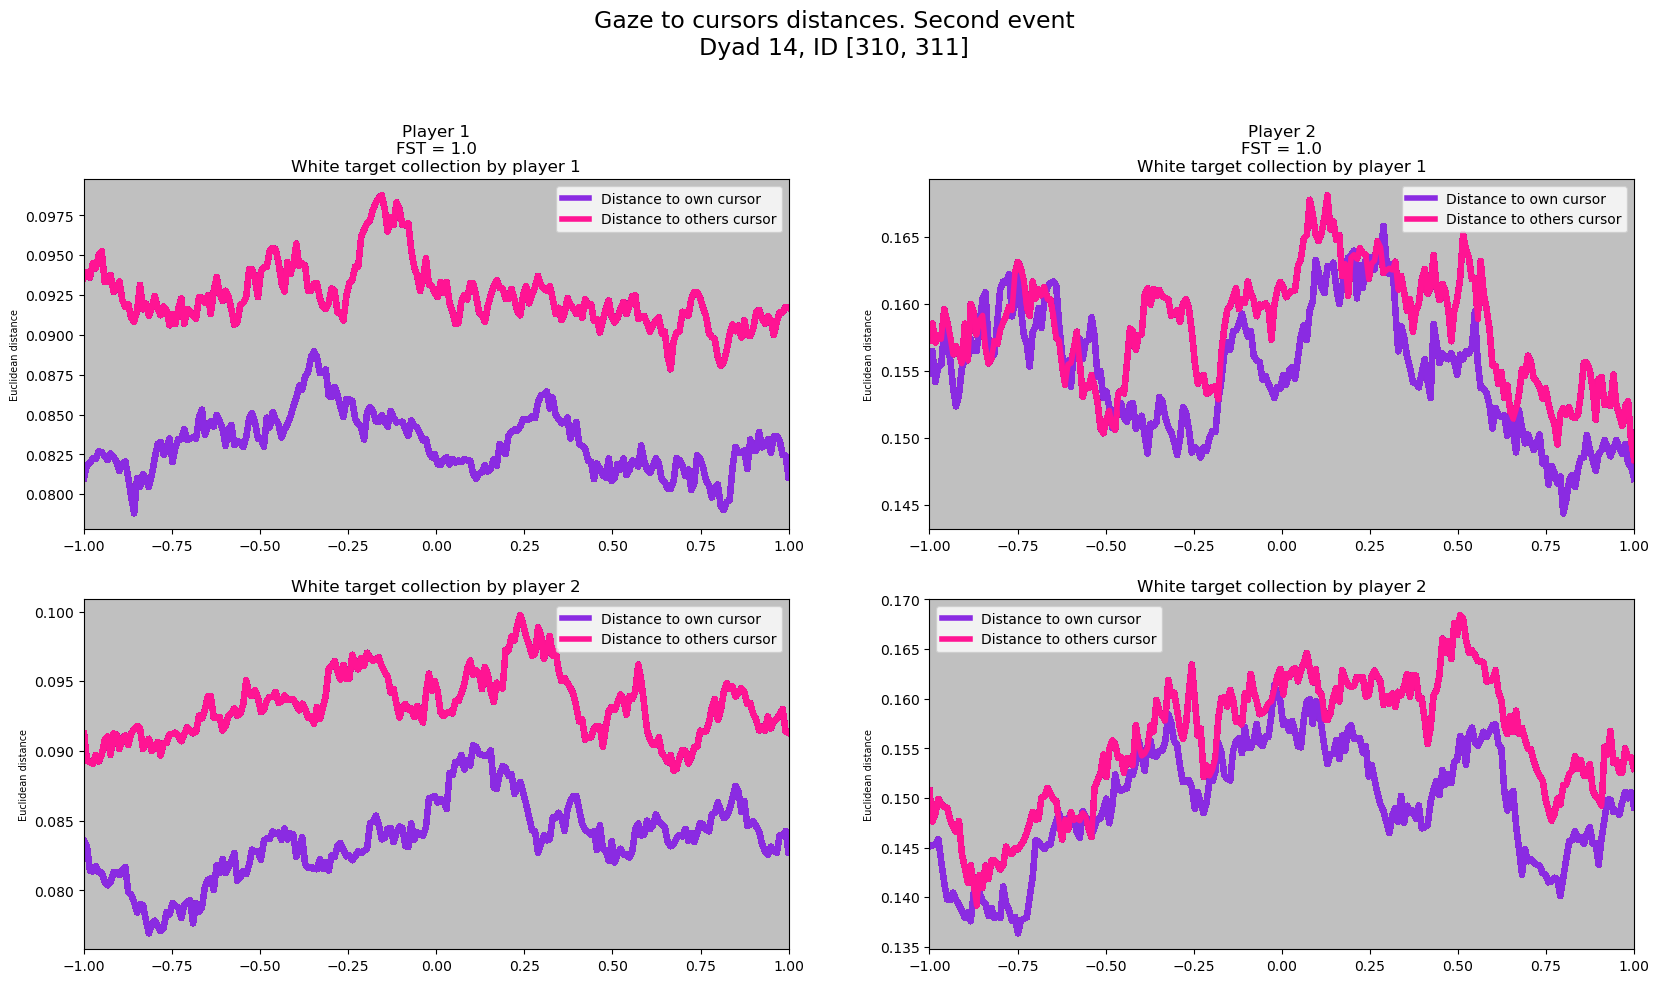

In [11]:
#Figure 6. This code creates plots for gaze to cursors distances for event 2
average_g0_h0 = []
average_g0_h1 = []
average_g1_h0 = []
average_g1_h1 = []
for id in blue_joint:
    if d1_b1_d_g0_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h0.append(d1_b1_d_g0_h0.iloc[id-2*offset:id]) 
    if d1_b1_d_g0_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h1.append(d1_b1_d_g0_h1.iloc[id-2*offset:id])
    if d1_b1_d_g1_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h0.append(d1_b1_d_g1_h0.iloc[id-2*offset:id])
    if d1_b1_d_g1_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h1.append(d1_b1_d_g1_h1.iloc[id-2*offset:id])
g0_h0 = np.array(average_g0_h0)
median_g0_h0 = np.nanmedian(g0_h0, axis=0)
g0_h1 = np.array(average_g0_h1)
median_g0_h1 = np.nanmedian(g0_h1, axis=0)
g1_h0 = np.array(average_g1_h0)
median_g1_h0 = np.nanmedian(g1_h0, axis=0)
g1_h1 = np.array(average_g1_h1)
median_g1_h1 = np.nanmedian(g1_h1, axis=0)

average_g0_h0_y = []
average_g0_h1_y = []
average_g1_h0_y = []
average_g1_h1_y = []
for id in yellow_joint:
    if d1_b1_d_g0_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h0_y.append(d1_b1_d_g0_h0.iloc[id-2*offset:id])
    if d1_b1_d_g0_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h1_y.append(d1_b1_d_g0_h1.iloc[id-2*offset:id])
    if d1_b1_d_g1_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h0_y.append(d1_b1_d_g1_h0.iloc[id-2*offset:id])
    if d1_b1_d_g1_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h1_y.append(d1_b1_d_g1_h1.iloc[id-2*offset:id])
g0_h0_y = np.array(average_g0_h0_y)
median_g0_h0_y = np.nanmedian(g0_h0_y, axis=0)
g0_h1_y = np.array(average_g0_h1_y)
median_g0_h1_y = np.nanmedian(g0_h1_y, axis=0)
g1_h0_y = np.array(average_g1_h0_y)
median_g1_h0_y = np.nanmedian(g1_h0_y, axis=0)
g1_h1_y = np.array(average_g1_h1_y)
median_g1_h1_y = np.nanmedian(g1_h1_y, axis=0)

average_g0_h0_w0 = []
average_g0_h1_w0 = []
average_g1_h0_w0 = []
average_g1_h1_w0 = []
for id in white_p0:
    if d1_b1_d_g0_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h0_w0.append(d1_b1_d_g0_h0.iloc[id-2*offset:id])
    if d1_b1_d_g0_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h1_w0.append(d1_b1_d_g0_h1.iloc[id-2*offset:id])
    if d1_b1_d_g1_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h0_w0.append(d1_b1_d_g1_h0.iloc[id-2*offset:id])
    if d1_b1_d_g1_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h1_w0.append(d1_b1_d_g1_h1.iloc[id-2*offset:id])
g0_h0_w0 = np.array(average_g0_h0_w0)
median_g0_h0_w0 = np.nanmedian(g0_h0_w0, axis=0)    
g0_h1_w0 = np.array(average_g0_h1_w0)
median_g0_h1_w0 = np.nanmedian(g0_h1_w0, axis=0)
g1_h0_w0 = np.array(average_g1_h0_w0)
median_g1_h0_w0 = np.nanmedian(g1_h0_w0, axis=0)
g1_h1_w0 = np.array(average_g1_h1_w0)
median_g1_h1_w0 = np.nanmedian(g1_h1_w0, axis=0)

average_g0_h0_w1 = []
average_g0_h1_w1 = []
average_g1_h0_w1 = []
average_g1_h1_w1 = []
for id in white_p1:
    if d1_b1_d_g0_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h0_w1.append(d1_b1_d_g0_h0.iloc[id-2*offset:id])
    if d1_b1_d_g0_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g0_h1_w1.append(d1_b1_d_g0_h1.iloc[id-2*offset:id])
    if d1_b1_d_g1_h0.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h0_w1.append(d1_b1_d_g1_h0.iloc[id-2*offset:id])
    if d1_b1_d_g1_h1.iloc[id-2*offset:id].max()<2**(1/2):
        average_g1_h1_w1.append(d1_b1_d_g1_h1.iloc[id-2*offset:id])
g0_h0_w1 = np.array(average_g0_h0_w1)
median_g0_h0_w1 = np.nanmedian(g0_h0_w1, axis=0)
g0_h1_w1 = np.array(average_g0_h1_w1)
median_g0_h1_w1 = np.nanmedian(g0_h1_w1, axis=0)
g1_h0_w1 = np.array(average_g1_h0_w1)
median_g1_h0_w1 = np.nanmedian(g1_h0_w1, axis=0)
g1_h1_w1 = np.array(average_g1_h1_w1)
median_g1_h1_w1 = np.nanmedian(g1_h1_w1, axis=0)


if game==10 or game==14: 
    plt.figure(figsize=(20, 10))
    plt.suptitle(f'Gaze to cursors distances. Second event\nDyad {game}, ID {dyad}',y=1.05,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in white_p0:
            plt.subplot(2,2,1,facecolor='silver',alpha=0.3)
            plt.title(f'Player 1\nFST = {FST_player1}\nWhite target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(2,2,2,facecolor='silver',alpha=0.3)
            plt.title(f'Player 2\nFST = {FST_player2}\nWhite target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w0,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            
        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(2,2,3,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)     
            plt.subplot(2,2,4,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w1,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)  
            
else:        
    plt.figure(figsize=(20, 20))
    plt.suptitle(f'Gaze to cursors distances. Second event\nDyad {game}, ID {dyad}',y=0.95,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in blue_joint:
            plt.subplot(4,2,1,facecolor='deepskyblue',alpha=0.3)
            plt.title(f'Player 1\nFST = {FST_player1}\nBlue target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(4,2,2,facecolor='deepskyblue',alpha=0.3)
            plt.title(f'Player 2\nFST = {FST_player2}\nBlue target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in yellow_joint:
            plt.subplot(4,2,3,facecolor='orange',alpha=0.3)
            plt.title(f'Yellow target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_y,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_y,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(4,2,4,facecolor='orange',alpha=0.3)
            plt.title(f'Yellow target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_y,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_y,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in white_p0:
            plt.subplot(4,2,5,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 1')   
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            
            plt.subplot(4,2,6,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w0,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(4,2,7,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2') 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)    
            
            plt.subplot(4,2,8,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w1,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

IndexError: list index out of range

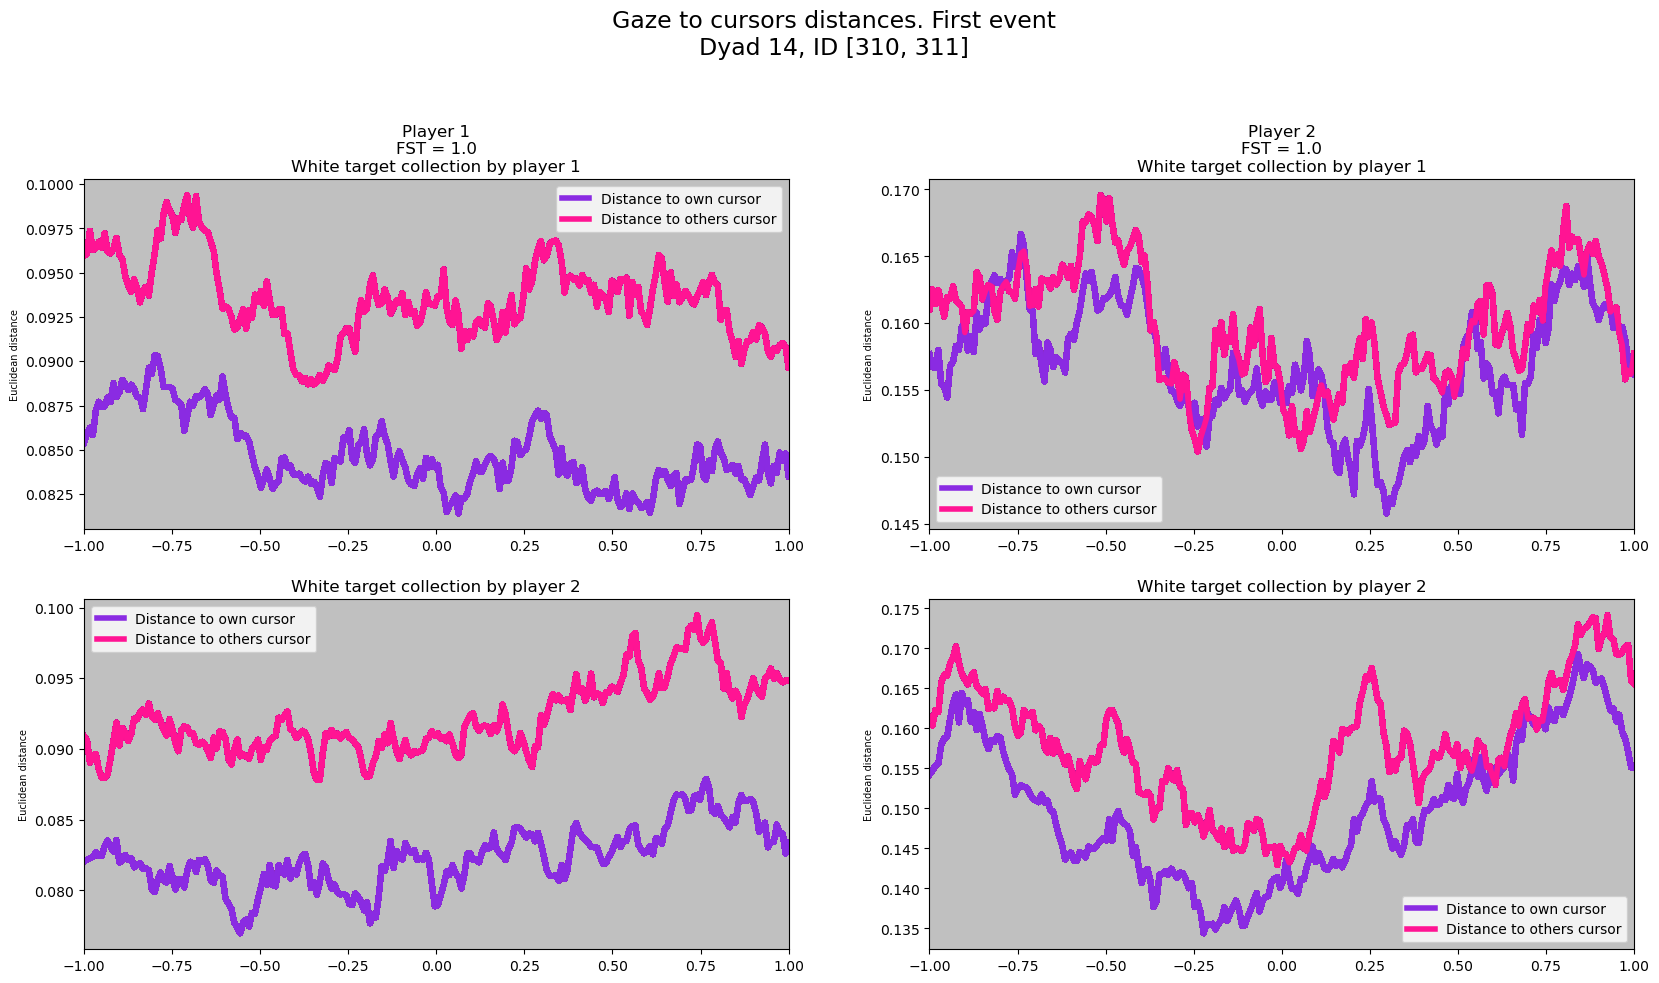

In [12]:
#Figure 7. This code creates plots for gaze to cursors distances for event 1
average_g0_h0 = []
average_g0_h1 = []
average_g1_h0 = []
average_g1_h1 = []
average_g0_h0_y = []
average_g0_h1_y = []
average_g1_h0_y = []
average_g1_h1_y = []
average_g0_h0_w0 = []
average_g0_h1_w0 = []
average_g1_h0_w0 = []
average_g1_h1_w0 = []
average_g0_h0_w1 = []
average_g0_h1_w1 = []
average_g1_h0_w1 = []
average_g1_h1_w1 = []
for trial_id in range(trials_number-1):
    if trial_end[trial_id+1] in blue_joint:
        if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h0.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset]) 
        if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h1.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h0.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h1.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in yellow_joint:
        if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h0_y.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h1_y.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h0_y.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h1_y.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in white_p0:
        if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h0_w0.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h1_w0.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h0_w0.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h1_w0.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    if trial_end[trial_id+1] in white_p1:
        if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h0_w1.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g0_h1_w1.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h0_w1.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_g1_h1_w1.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
g0_h0 = np.array(average_g0_h0)
median_g0_h0 = np.nanmedian(g0_h0, axis=0)
g0_h1 = np.array(average_g0_h1)
median_g0_h1 = np.nanmedian(g0_h1, axis=0)
g1_h0 = np.array(average_g1_h0)
median_g1_h0 = np.nanmedian(g1_h0, axis=0)
g1_h1 = np.array(average_g1_h1)
median_g1_h1 = np.nanmedian(g1_h1, axis=0)
g0_h0_y = np.array(average_g0_h0_y)
median_g0_h0_y = np.nanmedian(g0_h0_y, axis=0)
g0_h1_y = np.array(average_g0_h1_y)
median_g0_h1_y = np.nanmedian(g0_h1_y, axis=0)
g1_h0_y = np.array(average_g1_h0_y)
median_g1_h0_y = np.nanmedian(g1_h0_y, axis=0)
g1_h1_y = np.array(average_g1_h1_y)
median_g1_h1_y = np.nanmedian(g1_h1_y, axis=0)
g0_h0_w0 = np.array(average_g0_h0_w0)
median_g0_h0_w0 = np.nanmedian(g0_h0_w0, axis=0)    
g0_h1_w0 = np.array(average_g0_h1_w0)
median_g0_h1_w0 = np.nanmedian(g0_h1_w0, axis=0)
g1_h0_w0 = np.array(average_g1_h0_w0)
median_g1_h0_w0 = np.nanmedian(g1_h0_w0, axis=0)
g1_h1_w0 = np.array(average_g1_h1_w0)
median_g1_h1_w0 = np.nanmedian(g1_h1_w0, axis=0)
g0_h0_w1 = np.array(average_g0_h0_w1)
median_g0_h0_w1 = np.nanmedian(g0_h0_w1, axis=0)
g0_h1_w1 = np.array(average_g0_h1_w1)
median_g0_h1_w1 = np.nanmedian(g0_h1_w1, axis=0)
g1_h0_w1 = np.array(average_g1_h0_w1)
median_g1_h0_w1 = np.nanmedian(g1_h0_w1, axis=0)
g1_h1_w1 = np.array(average_g1_h1_w1)
median_g1_h1_w1 = np.nanmedian(g1_h1_w1, axis=0)

if game==10 or game==14: 
    plt.figure(figsize=(20, 10))
    plt.suptitle(f'Gaze to cursors distances. First event\nDyad {game}, ID {dyad}',y=1.05,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in white_p0:
            plt.subplot(2,2,1,facecolor='silver',alpha=0.3)
            plt.title(f'Player 1\nFST = {FST_player1}\nWhite target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(2,2,2,facecolor='silver',alpha=0.3)
            plt.title(f'Player 2\nFST = {FST_player2}\nWhite target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w0,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)
            
        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(2,2,3,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)     
            plt.subplot(2,2,4,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w1,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)  
            
else:        
    plt.figure(figsize=(20, 20))
    plt.suptitle(f'Gaze to cursors distances. First event\nDyad {game}, ID {dyad}',y=0.95,fontsize=17)
    for trial_id in range(trials_number):
        if trial_end[trial_id+1] in blue_joint:
            plt.subplot(4,2,1,facecolor='deepskyblue',alpha=0.3)
            plt.title(f'Player 1\nFST = {FST_player1}\nBlue target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(4,2,2,facecolor='deepskyblue',alpha=0.3)
            plt.title(f'Player 2\nFST = {FST_player2}\nBlue target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in yellow_joint:
            plt.subplot(4,2,3,facecolor='orange',alpha=0.3)
            plt.title(f'Yellow target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_y,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_y,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            plt.subplot(4,2,4,facecolor='orange',alpha=0.3)
            plt.title(f'Yellow target collection')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_y,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_y,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in white_p0:
            plt.subplot(4,2,5,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 1')   
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w0,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 
            
            plt.subplot(4,2,6,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 1')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w0,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w0,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

        elif trial_end[trial_id+1] in white_p1:
            plt.subplot(4,2,7,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2') 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h0_w1,c='blueviolet',linewidth=4.0)
            plt.plot(np.linspace(-1, 1, 2*offset), median_g0_h1_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1)    
            
            plt.subplot(4,2,8,facecolor='silver',alpha=0.3)
            plt.title(f'White target collection by player 2')
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h1_w1,c='blueviolet',linewidth=4.0) 
            plt.plot(np.linspace(-1, 1, 2*offset), median_g1_h0_w1,c='deeppink',linewidth=4.0)
            plt.legend(['Distance to own cursor','Distance to others cursor'])
            plt.ylabel('Euclidean distance',fontsize=7)
            plt.xlim(-1,1) 

Dyad 9 is excluded for technical reasons


/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2860441117.py:206: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2860441117.py:222: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2860441117.py:238: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


[[0.08795971 0.0873731  0.08611385 ... 0.0894243  0.09065963 0.09111859]
 [0.08643745 0.08610522 0.08588921 ... 0.0891922  0.08962659 0.08954248]
 [0.08283187 0.08321391 0.08276133 ... 0.09097652 0.09070501 0.09068433]
 ...
 [0.07412178 0.07383149 0.07377521 ... 0.08218692 0.08193465 0.08181772]
 [0.07439524 0.07418802 0.07397638 ... 0.08186773 0.08158042 0.081546  ]
 [0.07439524 0.07418802 0.07397638 ... 0.08186773 0.08158042 0.081546  ]]


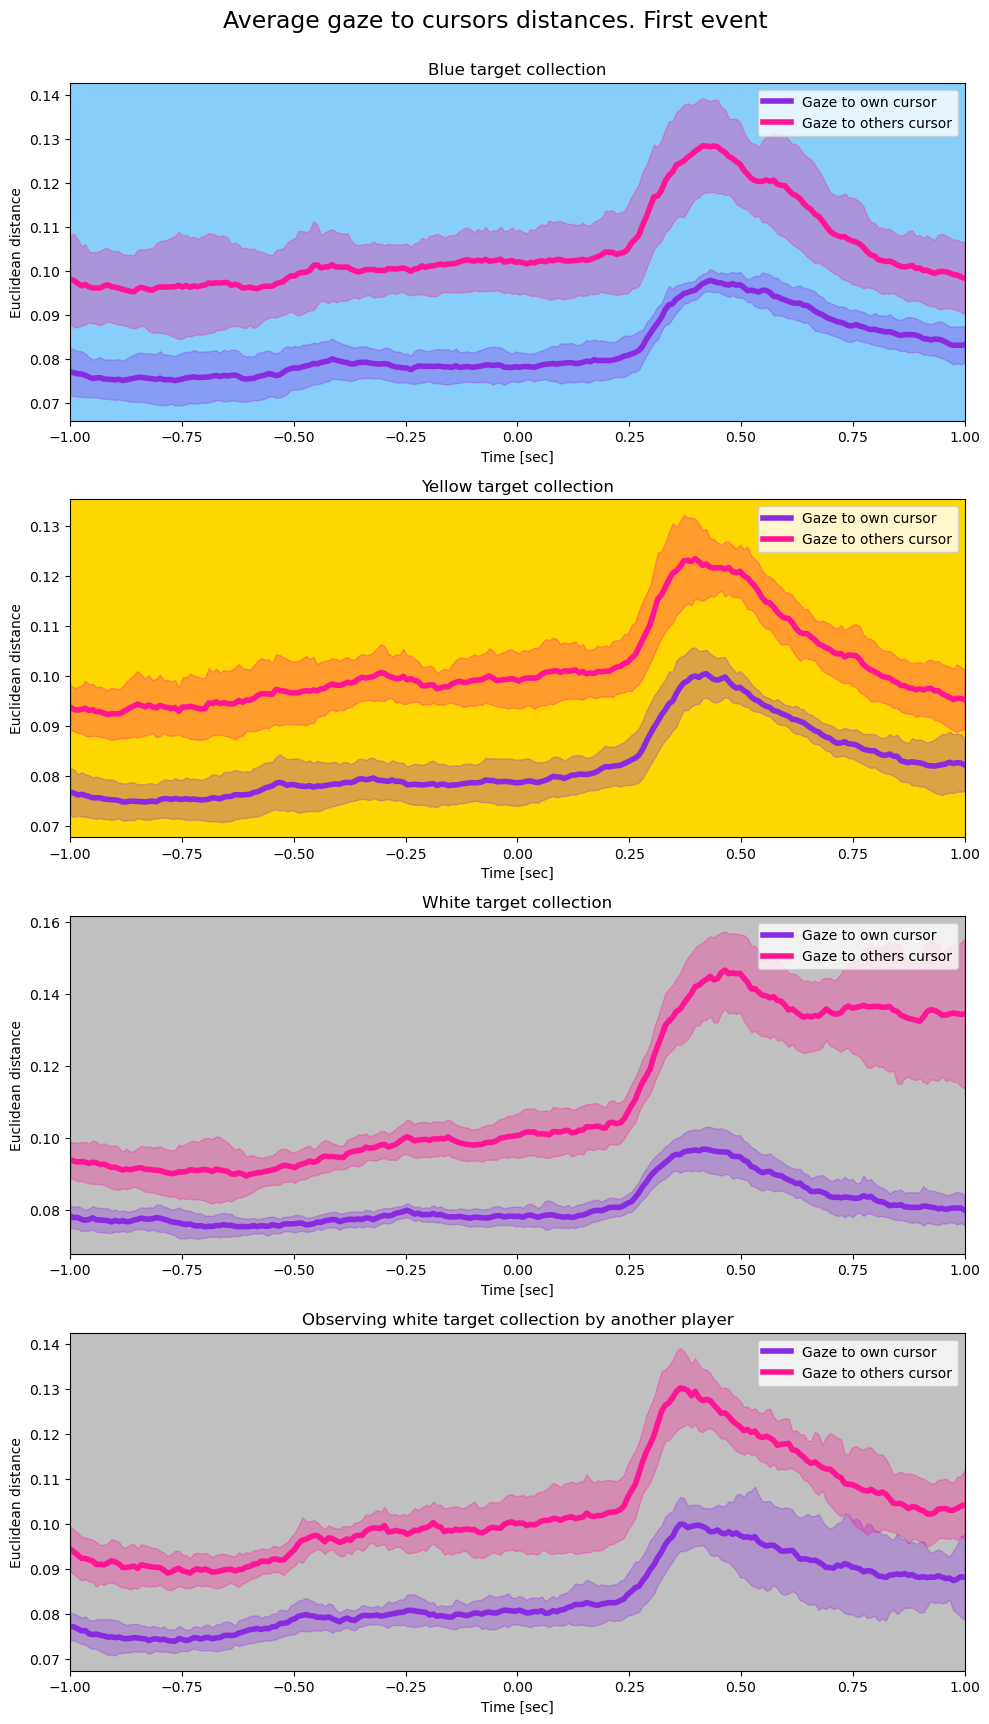

In [23]:
#Figure 8. Average gaze to cursors distances with standard deviation. Event1
#Creating empty lists for medians from each dyad
empty_first_g_h0_b = []
empty_first_g_h1_b = []
empty_first_g_h0_y = []
empty_first_g_h1_y = []
empty_first_g_h0_w = []
empty_first_g_h1_w = []
empty_first_g_h0_w_obs = []
empty_first_g_h1_w_obs = []
#Creating empty lists for mean of medians across dyads
list_first_g_h0_b = []
list_first_g_h1_b = []
list_first_g_h0_y = []
list_first_g_h1_y = []
list_first_g_h0_w = []
list_first_g_h1_w = []
list_first_g_h0_w_obs = []
list_first_g_h1_w_obs = []
game='range'
for game in range(1,15):
    if game==1:
        dyad='[100, 101]'
    elif game==2:
        dyad='[102, 103]'
    elif game==3:
        dyad='[104, 105]'
    elif game==4:
        dyad='[200, 201]'
    elif game==5:
        dyad='[202, 203]'
    elif game==6:
        dyad='[204, 205]'
    elif game==7:
        dyad='[206, 207]'
    elif game==8:
        dyad='[208, 209]'
    elif game==9:
        print('Dyad 9 is excluded for technical reasons')
    elif game==10:
        dyad='[300, 301]'
    elif game==11:
        dyad='[304, 305]'
    elif game==12:
        dyad='[306, 307]'
    elif game==13:
        dyad='[308, 309]'
    elif game==14:
        dyad='[310, 311]'
    else:
        print('Choose dyad from 1 to 14')
    if len(records[dyad].keys())==3:  
        d1_b1=[records[dyad][1], records[dyad][2], records[dyad][3]]
        d1_b1=pd.concat(d1_b1)
    elif len(records[dyad].keys())==2:
        d1_b1=[records[dyad][1], records[dyad][2]]
        d1_b1=pd.concat(d1_b1)
    d1_b1_d_first_g_h0=((d1_b1['p0_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
    d1_b1_d_first_g_h1=((d1_b1['p1_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
    d1_b1_d_g1_h0=((d1_b1['p0_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)
    d1_b1_d_g1_h1=((d1_b1['p1_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)
    sum_c=d1_b1['comp_collected_by_p0']+d1_b1['comp_collected_by_p1'] + d1_b1['coop0_collected']+d1_b1['coop1_collected']
    trial_end=list(np.where(sum_c>0)[0])
    trials_number=len(trial_end)
    white_p0=list(np.where(d1_b1['comp_collected_by_p0']>0)[0])
    white_p1=list(np.where(d1_b1['comp_collected_by_p1']>0)[0])
    blue_joint=list(np.where(d1_b1['coop0_collected']>0)[0])
    yellow_joint=list(np.where(d1_b1['coop1_collected']>0)[0])
    FST_player1=round(len(white_p0)/(len(white_p0)+len(yellow_joint)+len(blue_joint)),2)
    FST_player2=round(len(white_p1)/(len(white_p1)+len(yellow_joint)+len(blue_joint)),2)
    for trial_id in range(trials_number-1):
        #blue
        if trial_end[trial_id+1] in blue_joint:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_b.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset]) 
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_b.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_b.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_b.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in yellow_joint:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_y.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_y.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_y.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_y.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in white_p0:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_w.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_w.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_w_obs.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_w_obs.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if trial_end[trial_id+1] in white_p1:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_w_obs.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_w_obs.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h1_w.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
                empty_first_g_h0_w.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
    first_g_h0_b = np.array(empty_first_g_h0_b)
    median_first_g_h0_b = np.nanmedian(first_g_h0_b, axis=0)
    list_first_g_h0_b.append(median_first_g_h0_b)
    
    first_g_h1_b = np.array(empty_first_g_h1_b)
    median_first_g_h1_b = np.nanmedian(first_g_h1_b, axis=0)
    list_first_g_h1_b.append(median_first_g_h1_b)
    
    first_g_h0_y = np.array(empty_first_g_h0_y)
    median_first_g_h0_y = np.nanmedian(first_g_h0_y, axis=0)
    list_first_g_h0_y.append(median_first_g_h0_y)
    
    first_g_h1_y = np.array(empty_first_g_h1_y)
    median_first_g_h1_y = np.nanmedian(first_g_h1_y, axis=0)
    list_first_g_h1_y.append(median_first_g_h1_y)
    
    first_g_h0_w = np.array(empty_first_g_h0_w)
    median_first_g_h0_w = np.nanmedian(first_g_h0_w, axis=0) 
    list_first_g_h0_w.append(median_first_g_h0_w)
    
    first_g_h1_w = np.array(empty_first_g_h1_w)
    median_first_g_h1_w = np.nanmedian(first_g_h1_w, axis=0)
    list_first_g_h1_w.append(median_first_g_h1_w)
    
    first_g_h0_w_obs = np.array(empty_first_g_h0_w_obs)
    median_first_g_h0_w_obs = np.nanmedian(first_g_h0_w_obs, axis=0) 
    list_first_g_h0_w_obs.append(median_first_g_h0_w_obs)
    
    first_g_h1_w_obs = np.array(empty_first_g_h1_w_obs)
    median_first_g_h1_w_obs = np.nanmedian(first_g_h1_w_obs, axis=0)
    list_first_g_h1_w_obs.append(median_first_g_h1_w_obs)

list_first_g_h0_b=np.array(list_first_g_h0_b) 
mean_of_medians_first_g_h0_b = np.nanmean(list_first_g_h0_b, axis=0)
std_first_g_h0_b=np.nanstd(list_first_g_h0_b, axis=0)

list_first_g_h1_b=np.array(list_first_g_h1_b) 
mean_of_medians_first_g_h1_b = np.nanmean(list_first_g_h1_b, axis=0)
std_first_g_h1_b=np.nanstd(list_first_g_h1_b, axis=0)

list_first_g_h0_y=np.array(list_first_g_h0_y) 
mean_of_medians_first_g_h0_y = np.nanmean(list_first_g_h0_y, axis=0)
std_first_g_h0_y=np.nanstd(list_first_g_h0_y, axis=0)

list_first_g_h1_y=np.array(list_first_g_h1_y) 
mean_of_medians_first_g_h1_y = np.nanmean(list_first_g_h1_y, axis=0)
std_first_g_h1_y=np.nanstd(list_first_g_h1_y, axis=0)

list_first_g_h0_w=np.array(list_first_g_h0_w) 
mean_of_medians_first_g_h0_w = np.nanmean(list_first_g_h0_w, axis=0)
std_first_g_h0_w=np.nanstd(list_first_g_h0_w, axis=0)

list_first_g_h1_w=np.array(list_first_g_h1_w) 
mean_of_medians_first_g_h1_w = np.nanmean(list_first_g_h1_w, axis=0)
std_first_g_h1_w=np.nanstd(list_first_g_h1_w, axis=0)

list_first_g_h0_w_obs=np.array(list_first_g_h0_w_obs) 
mean_of_medians_first_g_h0_w_obs = np.nanmean(list_first_g_h0_w_obs, axis=0)
std_first_g_h0_w_obs=np.nanstd(list_first_g_h0_w_obs, axis=0)

list_first_g_h1_w_obs=np.array(list_first_g_h1_w_obs) 
mean_of_medians_first_g_h1_w_obs = np.nanmean(list_first_g_h1_w_obs, axis=0)
std_first_g_h1_w_obs=np.nanstd(list_first_g_h1_w_obs, axis=0)


plt.figure(figsize=(10, 17))
plt.suptitle(f'Average gaze to cursors distances. First event',y=1.0,fontsize=17)

plt.subplot(4,1,1,facecolor='lightskyblue',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_b, color='blueviolet', linewidth=4.0)
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_b, color='deeppink', linewidth=4.0)
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_b-std_first_g_h0_b, mean_of_medians_first_g_h0_b+std_first_g_h0_b, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_b-std_first_g_h1_b, mean_of_medians_first_g_h1_b+std_first_g_h1_b, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Blue target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,2,facecolor='gold',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_y, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_y, linewidth=4.0, color='deeppink')
# Shaded SE bands
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_y-std_first_g_h0_y, mean_of_medians_first_g_h0_y+std_first_g_h0_y, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_y-std_first_g_h1_y, mean_of_medians_first_g_h1_y+std_first_g_h1_y, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Yellow target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,3,facecolor='silver',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_w, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_w, linewidth=4.0, color='deeppink')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_w-std_first_g_h0_w, mean_of_medians_first_g_h0_w+std_first_g_h0_w, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_w-std_first_g_h1_w, mean_of_medians_first_g_h1_w+std_first_g_h1_w, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'White target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,4,facecolor='silver',alpha=0.1)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_w_obs, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_w_obs, linewidth=4.0, color='deeppink')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h0_w_obs-std_first_g_h0_w_obs, mean_of_medians_first_g_h0_w_obs+std_first_g_h0_w_obs, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians_first_g_h1_w_obs-std_first_g_h1_w_obs, mean_of_medians_first_g_h1_w_obs+std_first_g_h1_w_obs, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Observing white target collection by another player')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)



Dyad 9 is excluded for technical reasons


/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2275918211.py:205: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2275918211.py:221: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/l_/hnzkp0js3gj_9wsxqsjsd19r0000gn/T/ipykernel_6513/2275918211.py:238: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, -14.277777777777832, 'Time [sec]')

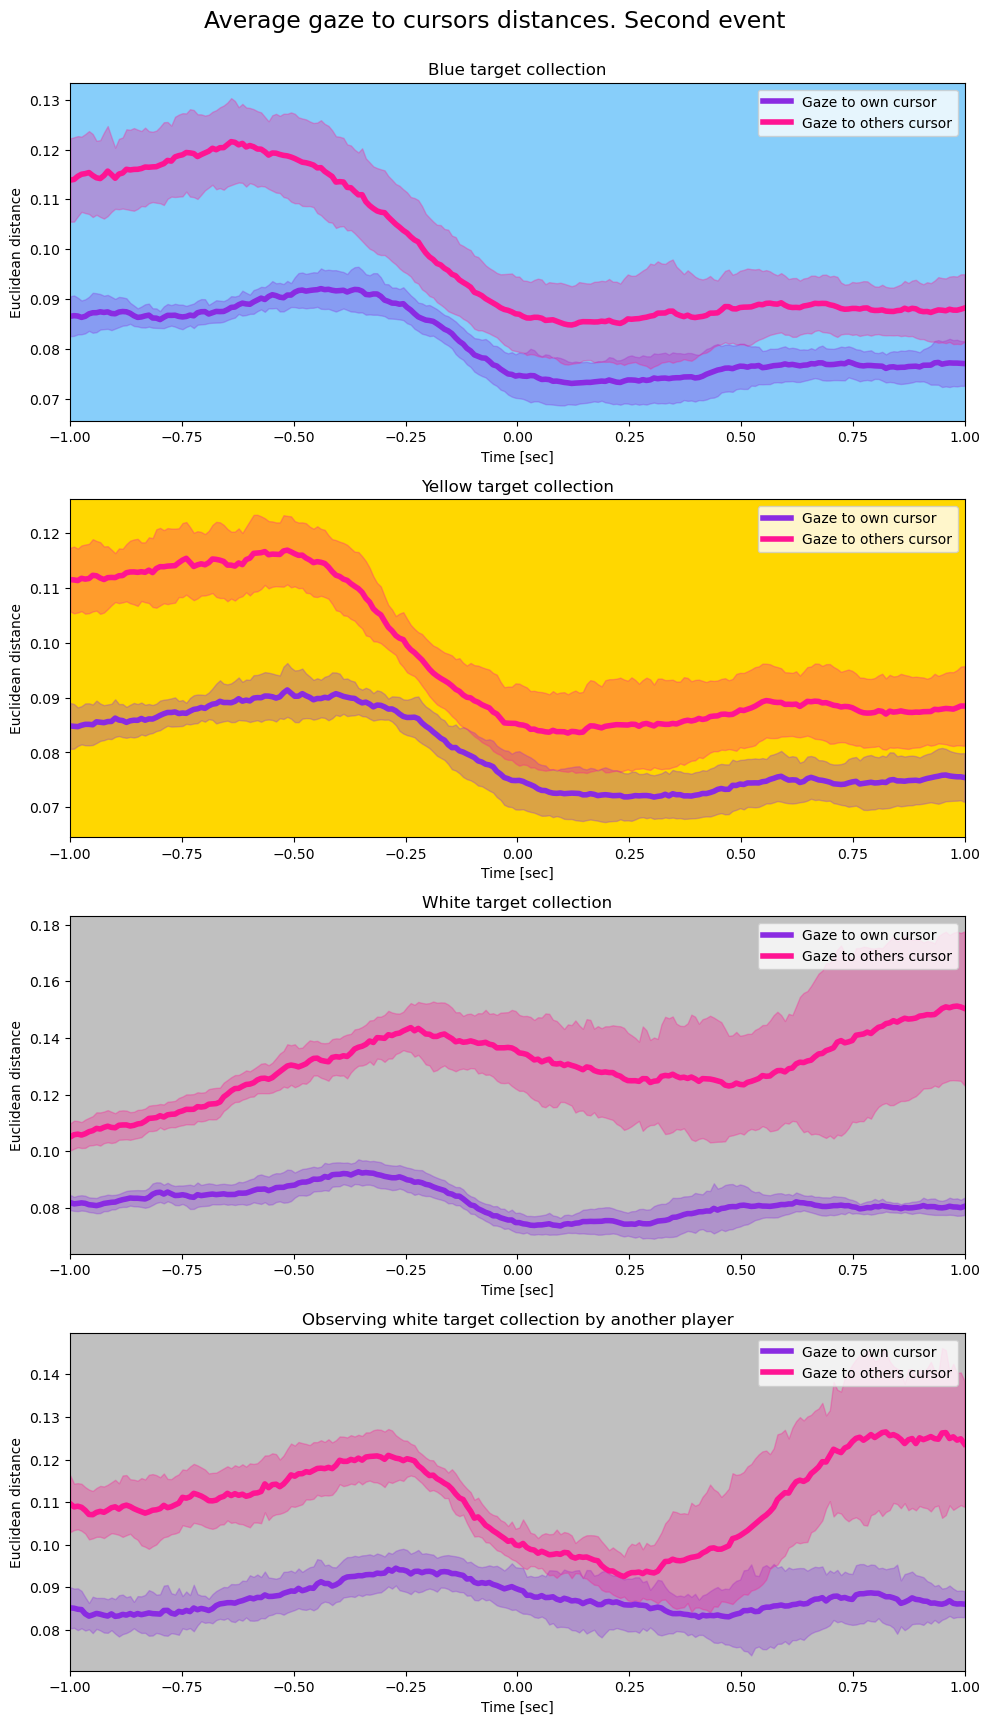

In [24]:
#Figure 9. Average gaze to cursors distances with standard deviation. Event2
empty_2_second_g_h0_b = []
empty_2_second_g_h1_b = []
empty_2_second_g_h0_y = []
empty_2_second_g_h1_y = []
empty_2_second_g_h0_w = []
empty_2_second_g_h1_w = []
empty_2_second_g_h0_w_obs = []
empty_2_second_g_h1_w_obs = []

list2_second_g_h0_b = []
list2_second_g_h1_b = []
list2_second_g_h0_y = []
list2_second_g_h1_y = []
list2_second_g_h0_w = []
list2_second_g_h1_w = []
list2_second_g_h0_w_obs = []
list2_second_g_h1_w_obs = []

for game in range(1,15):
    if game==1:
        dyad='[100, 101]'
    elif game==2:
        dyad='[102, 103]'
    elif game==3:
        dyad='[104, 105]'
    elif game==4:
        dyad='[200, 201]'
    elif game==5:
        dyad='[202, 203]'
    elif game==6:
        dyad='[204, 205]'
    elif game==7:
        dyad='[206, 207]'
    elif game==8:
        dyad='[208, 209]'
    elif game==9:
        print('Dyad 9 is excluded for technical reasons')
    elif game==10:
        dyad='[300, 301]'
    elif game==11:
        dyad='[304, 305]'
    elif game==12:
        dyad='[306, 307]'
    elif game==13:
        dyad='[308, 309]'
    elif game==14:
        dyad='[310, 311]'
    else:
        print('Choose dyad from 1 to 14')
    if len(records[dyad].keys())==3:  
        d1_b1=[records[dyad][1], records[dyad][2], records[dyad][3]]
        d1_b1=pd.concat(d1_b1)
    elif len(records[dyad].keys())==2:
        d1_b1=[records[dyad][1], records[dyad][2]]
        d1_b1=pd.concat(d1_b1)
    d1_b1_d_second_g_h0=((d1_b1['p0_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
    d1_b1_d_second_g_h1=((d1_b1['p1_agent_x'] - d1_b1['p0_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p0_gaze_y'])**2)**(1/2)
    d1_b1_d_g1_h0=((d1_b1['p0_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p0_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)
    d1_b1_d_g1_h1=((d1_b1['p1_agent_x'] - d1_b1['p1_gaze_x'])**2+(d1_b1['p1_agent_y'] - d1_b1['p1_gaze_y'])**2)**(1/2)
    sum_c=d1_b1['comp_collected_by_p0']+d1_b1['comp_collected_by_p1'] + d1_b1['coop0_collected']+d1_b1['coop1_collected']
    trial_end=list(np.where(sum_c>0)[0])
    trials_number=len(trial_end)
    white_p0=list(np.where(d1_b1['comp_collected_by_p0']>0)[0])
    white_p1=list(np.where(d1_b1['comp_collected_by_p1']>0)[0])
    blue_joint=list(np.where(d1_b1['coop0_collected']>0)[0])
    yellow_joint=list(np.where(d1_b1['coop1_collected']>0)[0])
    FST_player1=round(len(white_p0)/(len(white_p0)+len(yellow_joint)+len(blue_joint)),2)
    FST_player2=round(len(white_p1)/(len(white_p1)+len(yellow_joint)+len(blue_joint)),2)
    for trial_id in range(trials_number-1):
        #blue
        if trial_end[trial_id+1] in blue_joint:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_b.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]]) 
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_b.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_b.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_b.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
        if trial_end[trial_id+1] in yellow_joint:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_y.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_y.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_y.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_y.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
        if trial_end[trial_id+1] in white_p0:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_w.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_w.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_w_obs.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_w_obs.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
        if trial_end[trial_id+1] in white_p1:
            if d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_w_obs.append(d1_b1_d_g0_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_w_obs.append(d1_b1_d_g0_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h1_w.append(d1_b1_d_g1_h0.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
            if d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]].max()<2**(1/2):
                empty_2_second_g_h0_w.append(d1_b1_d_g1_h1.iloc[trial_end[trial_id+1]-2*offset:trial_end[trial_id+1]])
    second_g_h0_b = np.array(empty_2_second_g_h0_b)
    median2_second_g_h0_b = np.nanmedian(second_g_h0_b, axis=0)
    list2_second_g_h0_b.append(median2_second_g_h0_b)
    
    second_g_h1_b = np.array(empty_2_second_g_h1_b)
    median2_second_g_h1_b = np.nanmedian(second_g_h1_b, axis=0)
    list2_second_g_h1_b.append(median2_second_g_h1_b)
    
    second_g_h0_y = np.array(empty_2_second_g_h0_y)
    median2_second_g_h0_y = np.nanmedian(second_g_h0_y, axis=0)
    list2_second_g_h0_y.append(median2_second_g_h0_y)
    
    second_g_h1_y = np.array(empty_2_second_g_h1_y)
    median2_second_g_h1_y = np.nanmedian(second_g_h1_y, axis=0)
    list2_second_g_h1_y.append(median2_second_g_h1_y)
    
    second_g_h0_w = np.array(empty_2_second_g_h0_w)
    median2_second_g_h0_w = np.nanmedian(second_g_h0_w, axis=0) 
    list2_second_g_h0_w.append(median2_second_g_h0_w)
    
    second_g_h1_w = np.array(empty_2_second_g_h1_w)
    median2_second_g_h1_w = np.nanmedian(second_g_h1_w, axis=0)
    list2_second_g_h1_w.append(median2_second_g_h1_w)
    
    second_g_h0_w_obs = np.array(empty_2_second_g_h0_w_obs)
    median2_second_g_h0_w_obs = np.nanmedian(second_g_h0_w_obs, axis=0) 
    list2_second_g_h0_w_obs.append(median2_second_g_h0_w_obs)
    
    second_g_h1_w_obs = np.array(empty_2_second_g_h1_w_obs)
    median2_second_g_h1_w_obs = np.nanmedian(second_g_h1_w_obs, axis=0)
    list2_second_g_h1_w_obs.append(median2_second_g_h1_w_obs)

list2_second_g_h0_b=np.array(list2_second_g_h0_b) 
mean_of_medians2_second_g_h0_b = np.nanmean(list2_second_g_h0_b, axis=0)
std_second_g_h0_b=np.nanstd(list2_second_g_h0_b, axis=0)

list2_second_g_h1_b=np.array(list2_second_g_h1_b) 
mean_of_medians2_second_g_h1_b = np.nanmean(list2_second_g_h1_b, axis=0)
std_second_g_h1_b=np.nanstd(list2_second_g_h1_b, axis=0)

list2_second_g_h0_y=np.array(list2_second_g_h0_y) 
mean_of_medians2_second_g_h0_y = np.nanmean(list2_second_g_h0_y, axis=0)
std_second_g_h0_y=np.nanstd(list2_second_g_h0_y, axis=0)

list2_second_g_h1_y=np.array(list2_second_g_h1_y) 
mean_of_medians2_second_g_h1_y = np.nanmean(list2_second_g_h1_y, axis=0)
std_second_g_h1_y=np.nanstd(list2_second_g_h1_y, axis=0)

list2_second_g_h0_w=np.array(list2_second_g_h0_w) 
mean_of_medians2_second_g_h0_w = np.nanmean(list2_second_g_h0_w, axis=0)
std_second_g_h0_w=np.nanstd(list2_second_g_h0_w, axis=0)

list2_second_g_h1_w=np.array(list2_second_g_h1_w) 
mean_of_medians2_second_g_h1_w = np.nanmean(list2_second_g_h1_w, axis=0)
std_second_g_h1_w=np.nanstd(list2_second_g_h1_w, axis=0)

list2_second_g_h0_w_obs=np.array(list2_second_g_h0_w_obs) 
mean_of_medians2_second_g_h0_w_obs = np.nanmean(list2_second_g_h0_w_obs, axis=0)
std_second_g_h0_w_obs=np.nanstd(list2_second_g_h0_w_obs, axis=0)

list2_second_g_h1_w_obs=np.array(list2_second_g_h1_w_obs) 
mean_of_medians2_second_g_h1_w_obs = np.nanmean(list2_second_g_h1_w_obs, axis=0)
std_second_g_h1_w_obs=np.nanstd(list2_second_g_h1_w_obs, axis=0)


plt.figure(figsize=(10, 17))
plt.suptitle(f'Average gaze to cursors distances. Second event',y=1.0,fontsize=17)

plt.subplot(4,1,1,facecolor='lightskyblue',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_b, color='blueviolet', linewidth=4.0)
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_b, color='deeppink', linewidth=4.0)
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_b-std_second_g_h0_b, mean_of_medians2_second_g_h0_b+std_second_g_h0_b, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_b-std_second_g_h1_b, mean_of_medians2_second_g_h1_b+std_second_g_h1_b, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Blue target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,2,facecolor='gold',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_y, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_y, linewidth=4.0, color='deeppink')
# Shaded SE bands
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_y-std_second_g_h0_y, mean_of_medians2_second_g_h0_y+std_second_g_h0_y, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_y-std_second_g_h1_y, mean_of_medians2_second_g_h1_y+std_second_g_h1_y, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Yellow target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,3,facecolor='silver',alpha=0.3)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_w, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_w, linewidth=4.0, color='deeppink')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_w-std_second_g_h0_w, mean_of_medians2_second_g_h0_w+std_second_g_h0_w, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_w-std_second_g_h1_w, mean_of_medians2_second_g_h1_w+std_second_g_h1_w, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'White target collection')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])
plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)

plt.subplot(4,1,4,facecolor='silver',alpha=0.1)
# Mean curves
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_w_obs, linewidth=4.0, color='blueviolet')
plt.plot(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_w_obs, linewidth=4.0, color='deeppink')
# Shaded area for significant differences
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h0_w_obs-std_second_g_h0_w_obs, mean_of_medians2_second_g_h0_w_obs+std_second_g_h0_w_obs, color='blueviolet', alpha=0.3)
plt.fill_between(np.linspace(-1, 1, 2*offset), mean_of_medians2_second_g_h1_w_obs-std_second_g_h1_w_obs, mean_of_medians2_second_g_h1_w_obs+std_second_g_h1_w_obs, color='deeppink', alpha=0.3)
# Figure style
plt.title(f'Observing white target collection by another player')
plt.ylabel('Euclidean distance',fontsize=10)
#plt.ylim(0.065,0.165)
plt.xlim(-1,1)
plt.legend(['Gaze to own cursor', 'Gaze to others cursor'])

plt.tight_layout()
plt.xlabel('Time [sec]',fontsize=10)




ValueError: x and y must have same first dimension, but have shapes (230,) and (240,)

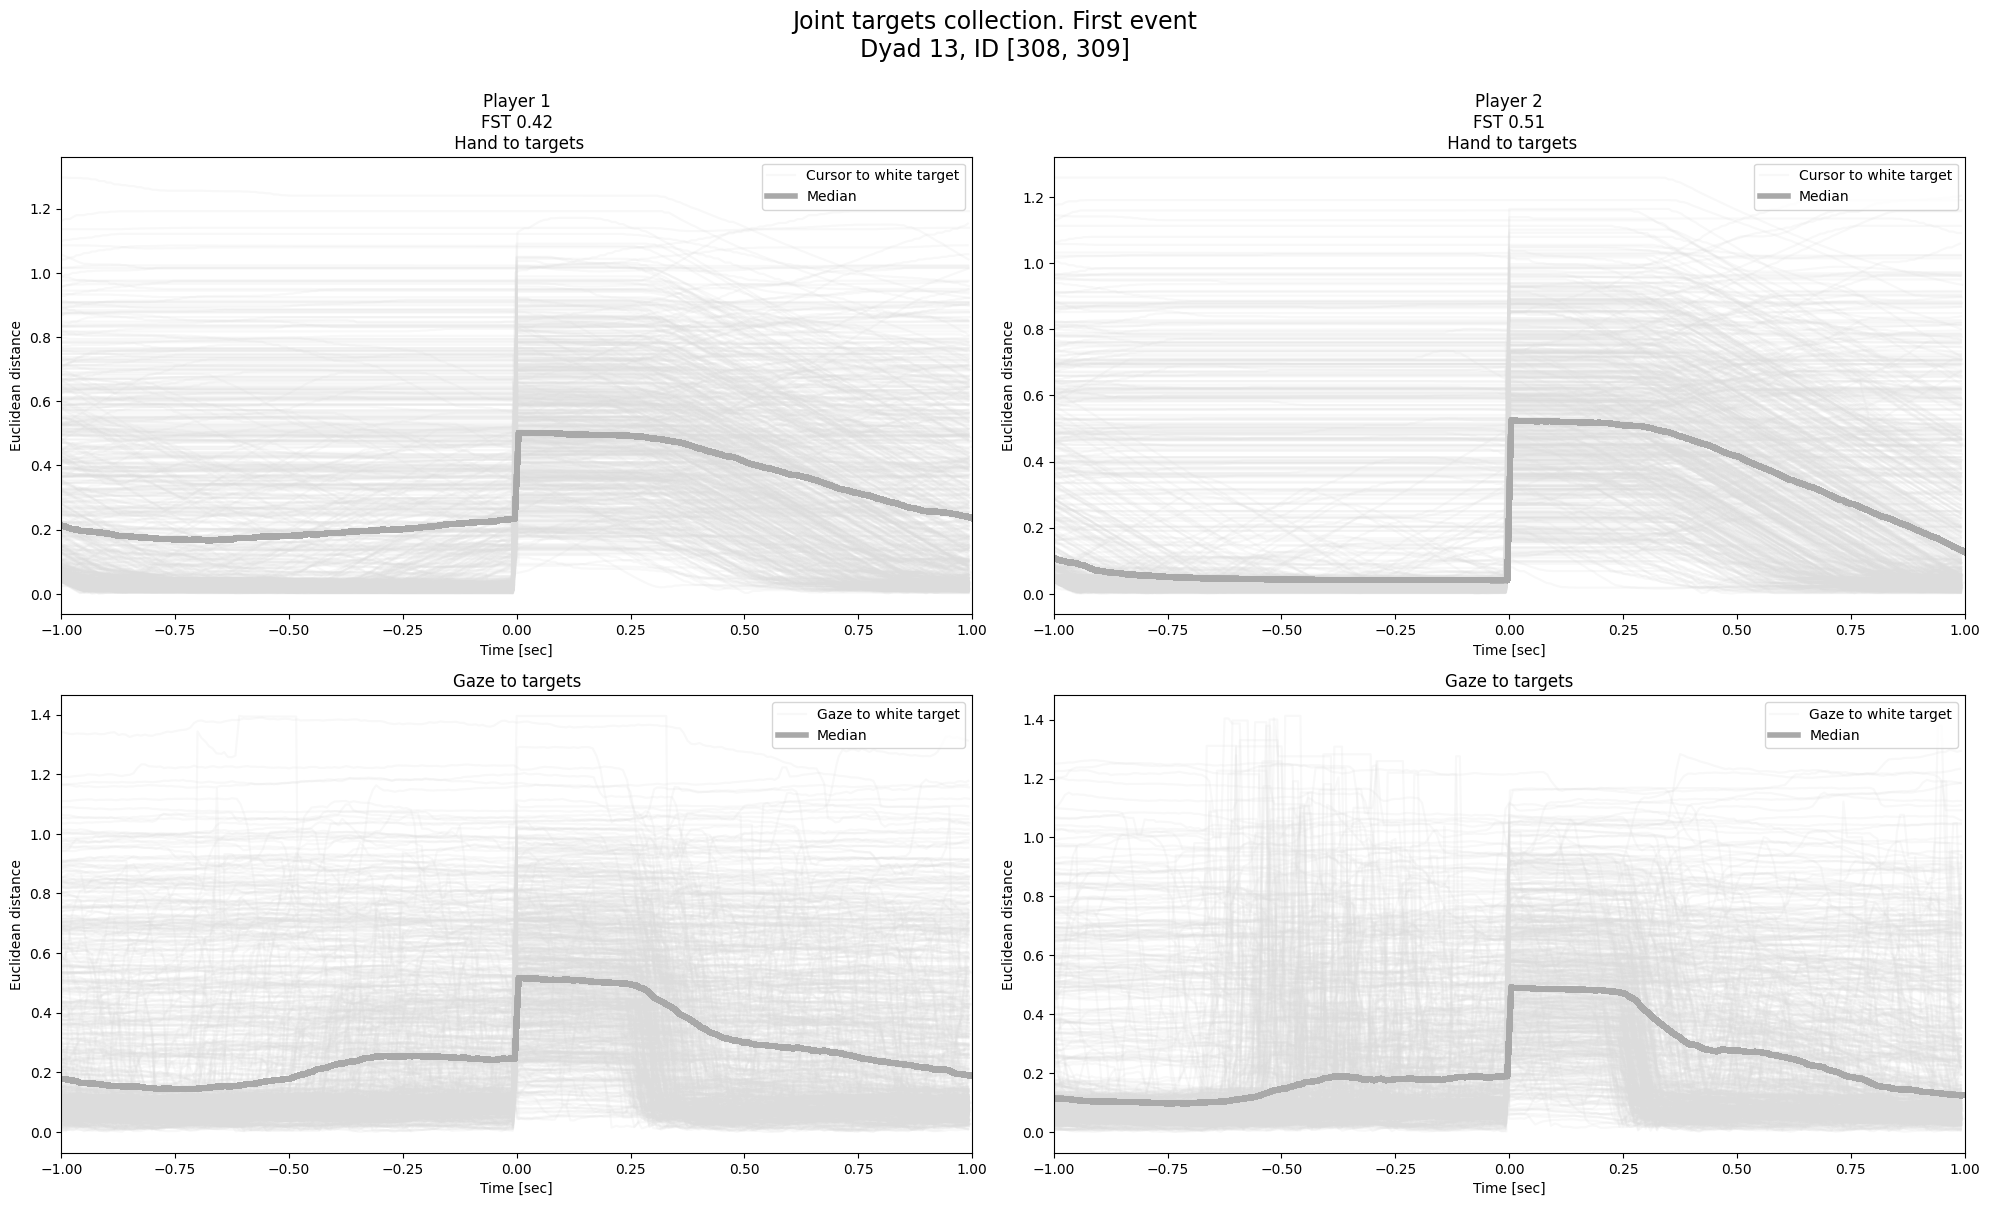

In [44]:
#Figure 10. Do subjects dont look at targets they don't collect? 
#The code draws distances to white targets, when joint targets are eventually collected. Event 1
average_h_w_0_s = []
average_h_w_s = []
average_e_w_0_s = []
average_e_w_s = []
average_h_w_0_p1_s = []
average_h_w_p1_s = []
average_e_w_0_p1_s= []
average_e_w_p1_s = []
for trial_id in range(trials_number-1):
    if trial_end[trial_id+1] in yellow_joint or blue_joint:
        if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_0_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_0_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_0_p1_s.append(d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_w_p1_s.append(d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_0_p1_s.append(d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_w_p1_s.append(d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
h_w_0_s = np.array(average_h_w_0_s)
median_h_w_0_s = np.nanmedian(h_w_0_s, axis=0)
h_w_s = np.array(average_h_w_s)
median_h_w_s = np.nanmedian(h_w_s, axis=0)
e_w_0_s = np.array(average_e_w_0_s)
median_e_w_0_s = np.nanmedian(e_w_0_s, axis=0)
e_w_s = np.array(average_e_w_s)
median_e_w_s = np.nanmedian(e_w_s, axis=0)
h_w_0_p1_s = np.array(average_h_w_0_p1_s)
median_h_w_0_p1_s = np.nanmedian(h_w_0_p1_s, axis=0)
h_w_p1_s = np.array(average_h_w_p1_s)
median_h_w_p1_s= np.nanmedian(h_w_p1_s, axis=0)
e_w_0_p1_s = np.array(average_e_w_0_p1_s)
median_e_w_0_p1_s = np.nanmedian(e_w_0_p1_s, axis=0)
e_w_p1_s = np.array(average_e_w_p1_s)
median_e_w_p1_s = np.nanmedian(e_w_p1_s, axis=0)

plt.figure(figsize=(20, 12))
plt.suptitle(f'Joint targets collection. First event\nDyad {game}, ID {dyad}',y=1.001,fontsize=17)
for trial_id in range(trials_number):
    if trial_end[trial_id+1] in yellow_joint or blue_joint:
        plt.subplot(2,2,1)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_0_s,c='darkgrey',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Player 1\nFST {FST_player1}\n Hand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to white target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(2,2,2)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_w_s,c='darkgrey',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Player 2\nFST {FST_player2}\n Hand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to white target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(2,2,3)
        if d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_0_s,c='darkgrey',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to white target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(2,2,4)
        if d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_w.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='gainsboro',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_w_s,c='darkgrey',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to white target', 'Median'],loc='upper right')
        plt.tight_layout()
        

ValueError: x and y must have same first dimension, but have shapes (230,) and (240,)

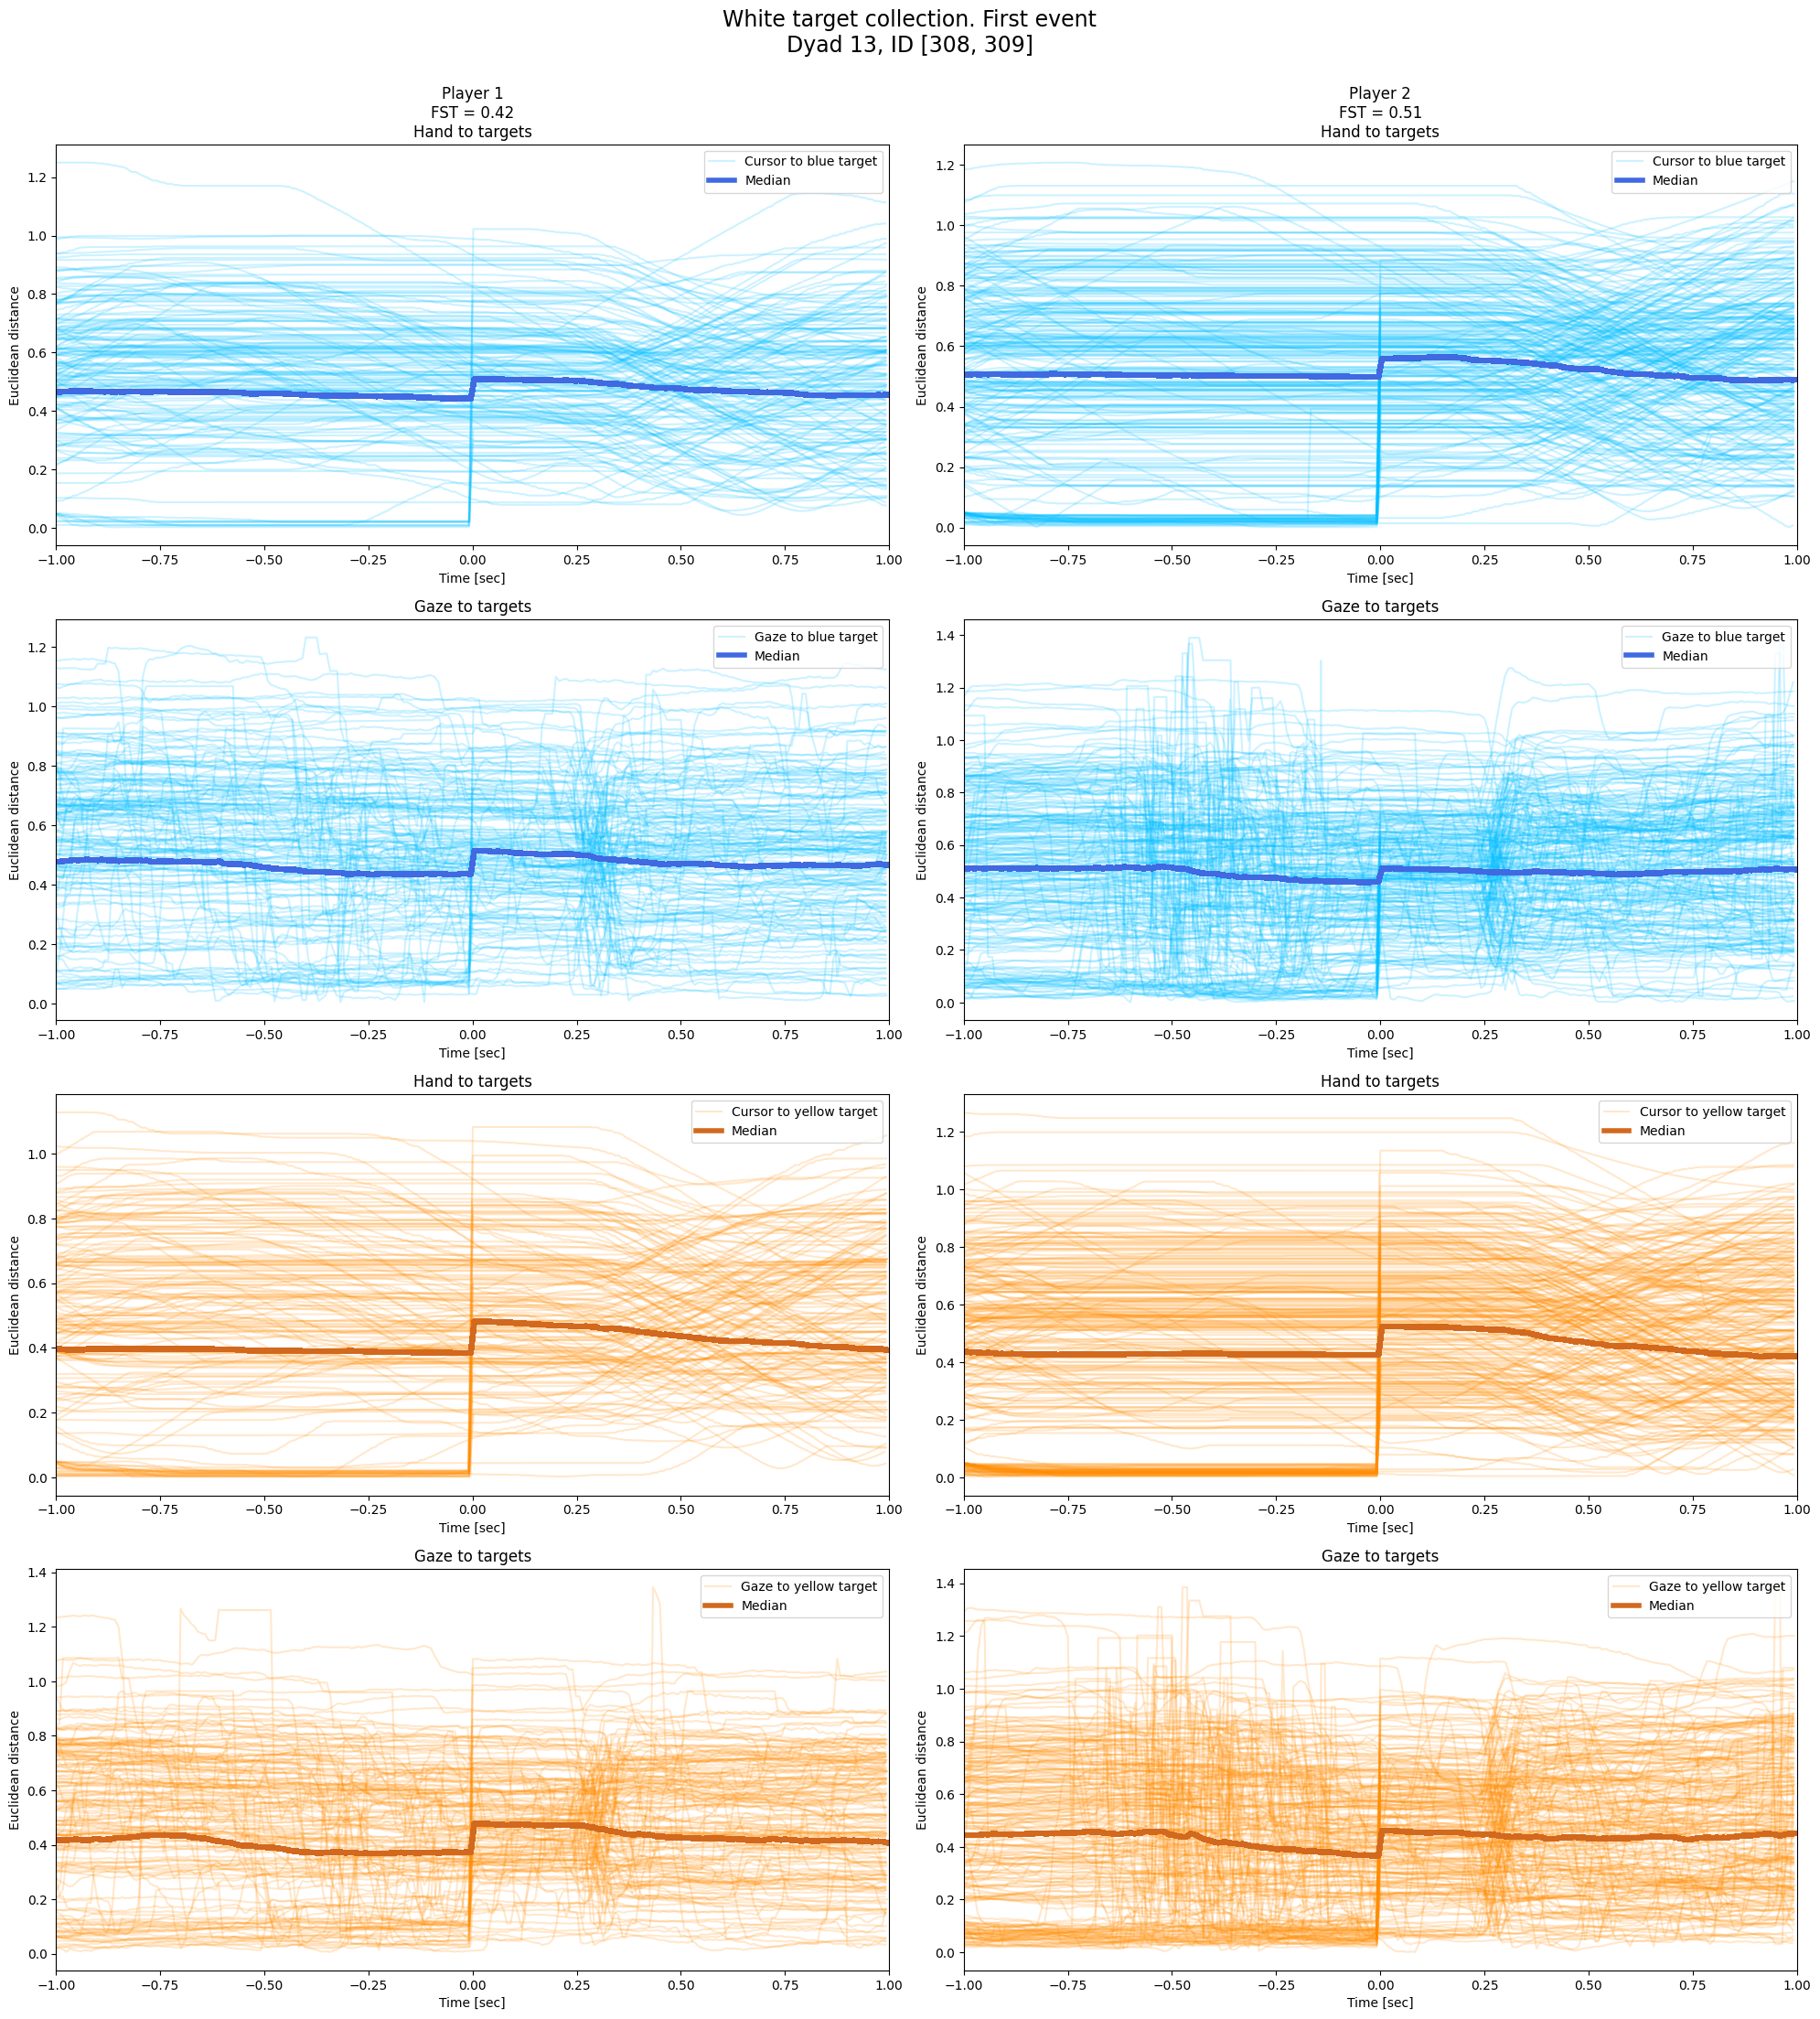

In [45]:
#Figure 11. 
#The code draws distances to joint targets, when white targets are eventually collected. Event 1
average_h_bj_0_s = []
average_h_bj_s = []
average_e_bj_0_s = []
average_e_bj_s = []
average_h_oj_0_s = []
average_h_oj_s = []
average_e_oj_0_s = []
average_e_oj_s = []
for trial_id in range(trials_number-1):
    if trial_end[trial_id+1] in white_p0 or white_p1:
        if d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_bj_0_s.append(d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_bj_s.append(d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_bj_0_s.append(d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_bj_s.append(d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_oj_0_s.append(d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_h_oj_s.append(d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_oj_0_s.append(d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
        if d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            average_e_oj_s.append(d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset])
h_bj_0_s = np.array(average_h_bj_0_s)
median_h_bj_0_s = np.nanmedian(h_bj_0_s, axis=0)
h_bj_s = np.array(average_h_bj_s)
median_h_bj_s = np.nanmedian(h_bj_s, axis=0)
bj_0_s = np.array(average_e_bj_0_s)
median_e_bj_0_s = np.nanmedian(bj_0_s, axis=0)
e_bj_s = np.array(average_e_bj_s)
median_e_bj_s = np.nanmedian(e_bj_s, axis=0)
h_oj_0_s = np.array(average_h_oj_0_s)
median_h_oj_0_s = np.nanmedian(h_oj_0_s, axis=0)
h_oj_s = np.array(average_h_oj_s)
median_h_oj_s = np.nanmedian(h_oj_s, axis=0)
e_oj_0_s = np.array(average_e_oj_0_s)
median_e_oj_0_s = np.nanmedian(e_oj_0_s, axis=0)
e_oj_s = np.array(average_e_oj_s)
median_e_oj_s = np.nanmedian(e_oj_s, axis=0)

plt.figure(figsize=(20, 22))
plt.suptitle(f'White target collection. First event\nDyad {game}, ID {dyad}',y=1.001,fontsize=17)
for trial_id in range(trials_number):
    if trial_end[trial_id+1] in white_p0:
        plt.subplot(4,2,1)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj_0_s,c='royalblue',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Player 1\nFST = {FST_player1}\nHand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to blue target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,3)
        if d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj_0_s,c='royalblue',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to blue target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,5)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj_0_s,c='chocolate',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Hand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to yellow target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,7)
        if d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj_0.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj_0_s,c='chocolate',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to yellow target', 'Median'],loc='upper right')
        plt.tight_layout()

    if trial_end[trial_id+1] in white_p1:
        plt.subplot(4,2,2)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_bj_s,c='royalblue',linewidth=4.0)
        plt.title(f'Player 2\nFST = {FST_player2}\nHand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlim(-1,1)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to blue target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,4)
        if d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_bj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='deepskyblue',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_bj_s,c='royalblue',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to blue target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,6)
        plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_h_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.2)
        plt.plot(np.linspace(-1, 1, 2*offset), median_h_oj_s,c='chocolate',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Hand to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Cursor to yellow target', 'Median'],loc='upper right')
        plt.tight_layout()
        
        plt.subplot(4,2,8)
        if d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset].max()<2**(1/2):
            plt.plot(frames.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset] - frames[trial_end[trial_id]-offset] - 1,d1_b1_d_e_oj.iloc[trial_end[trial_id]-offset:trial_end[trial_id]+offset],'-',c='darkorange',alpha=0.2)
            plt.plot(np.linspace(-1, 1, 2*offset), median_e_oj_s,c='chocolate',linewidth=4.0)
        plt.xlim(-1,1)
        plt.title(f'Gaze to targets')
        plt.ylabel('Euclidean distance',fontsize=10)
        plt.xlabel('Time [sec]',fontsize=10)
        plt.legend(['Gaze to yellow target', 'Median'], loc='upper right')
        plt.tight_layout()
        
        
